# Bank's Credit Card Service Churn Prediction
In this project, I will build a <b>machine learning model to predict customer's probability of churning in a bank's credit card service.</b> It involves <b>supervised learning (using a labeled training set) for classification</b>, where the <b>target</b> is <b>1</b> if the <b>customer churned</b>, else <b>0.</b>

I will use the following <b>pipeline</b> based on <b>CRISP-DM framework:</b>

<b>1. Define the business problem.</b><br>
<b>2. Collect the data and get a general overview of it.</b><br>
<b>3. Split the data into train and test sets.</b><br>
<b>4. Explore the data (exploratory data analysis)</b><br>
<b>5. Feature engineering, data cleaning and preprocessing.</b><br>
<b>6. Model training and comparison, feature selection and tuning.</b><br>
<b>7. Final production model testing and evaluation.</b><br>
<b>8. Conclude and interpret the model results.</b><br>
<b>9. Deploy.</b><br>


In <b>this notebook</b>, I will perform <b>exploratory data analysis (EDA), covering steps 1 to 4 of the pipeline.</b> The main <b>objective</b> here is to <b>uncover insights</b> that will give us <b>valuable information about churners' patterns</b> within the available features. Thus, even before building a model, it will be possible to help the bank with some churners profiles and tendencies.

Then, I will perform <b>machine learning modelling, covering steps 5 to 8 of the pipeline.</b> The main <b>objective</b> here is to <b>build a model that can accurately predict the probability of a customer churning.</b> Once I build this model, the <b>bank can plan strategies for client retention, maintaining healthy revenue. Acquiring new customers is costlier than keeping existing ones.</b> Furthermore, I will approach these steps in detail below, explaining why I am making each decision.

# 1. Business problem
- A <b>manager</b> at the <b>bank</b> is <b>disturbed</b> with more and more <b>customers leaving their credit card services</b>. They would really appreciate if one could <b>predict for them how likely is a customer to churn</b> so they can proactively go to the customers to <b>provide them better services and turn customers' decisions in the opposite direction.</b>
- <b>1.1 What is the context?</b>
    - When a <b>bank acquires a customer</b> for its credit card service, three essential <b>Key Performance Indicators (KPIs)</b> to consider include:
    
    - <b>1. Customer Acquisition Cost (CAC):</b> This measures the expenses associated with acquiring each credit card customer, encompassing marketing, sales, and related costs. Lower CAC reflects efficient customer acquisition.<br>
    - <b>2. Customer Lifetime Value (CLV):</b> CLV estimates the total revenue the bank can expect to generate from a credit card customer over their relationship. A higher CLV indicates that the customer's value surpasses the acquisition cost, ensuring long-term profitability.<br>
    - <b>3. Churn Rate:</b> Churn rate is typically expressed as a percentage and represents the number of credit card customers who have left during a specific period divided by the total number of customers at the beginning of that period.<br>
    - These <b>KPIs</b> help the bank assess the <b>effectiveness</b> of its strategies in acquiring credit card customers and gauge the potential long-term financial benefit of these acquisitions.
    - In order to <b>maximize profitability</b>, the bank aims to <b>minimize CAC and Churn while maximizing CLV.</b>

- <b>Which are the project objectives?</b>
    - <b>1. Identify the factors associated with customer churn.</b><br>
    - <b>2. Construct a model capable of accurately predicting the probability of a customer to churn.</b><br>
    - <b>3. Offer action plans for the bank to reduce credit card customer churn.</b><br>

- <b>Why the probability/score ordering approach?</b>
    - When deploying the model so that the bank can make predictions, the primary objective is to generate probability scores for each customer. This is typically more valuable for businesses when compared to making binary predictions (1/0), as it enables better decision-making and more effective customer retention strategies.
    - For instance, predicting the probability of churn provides more actionable insights. Instead of simply determining whether a customer will churn or not, you gain an understanding of how likely it is to happen. This information enables the bank to allocate its efforts and resources more effectively. For example, it can concentrate its retention efforts on customers with a high probability of churning, ordering the customer from the most likely to churn to the less likely.

- <b>Which are the benefits?</b>
    - <b>1. Cost Savings</b><br>
    - <b>2. Improved Customer Retention</b><br>
    - <b>3. Enhanced Customer Experience</b><br>
    - <b>4. Targeted Marketing</b><br>
    - <b>5. Revenue Protection</b><br>

And as a result, the mentioned <b>business problem will be resolved.</b>

In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


### Importing the libraries

In [ ]:
# Data manipulation and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import brier_score_loss, accuracy_score, precision_score, recall_score, f1_score
import time
import optuna
import shap
shap.initjs()

# For exception handling
import sys

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')



In [ ]:
### Visualization Settings
%matplotlib inline

#mpl.style.use('ggplot')

mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['grid.color']          = 'lightgray'
#mpl.rcParams['figure.dpi']          = 150
mpl.rcParams['axes.grid']           = True
mpl.rcParams['font.size']           = 12

# Palette Setting
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
# Setting as the palette
sns.set_palette(sns.color_palette(color_palette))
# Display
sns.color_palette(color_palette)

[(0.00784313725490196, 0.18823529411764706, 0.2784313725490196),
 (0.9098039215686274, 0.36470588235294116, 0.01568627450980392),
 (0.0, 0.4666666666666667, 0.7137254901960784),
 (1.0, 0.5098039215686274, 0.0),
 (0.0, 0.5882352941176471, 0.7803921568627451),
 (1.0, 0.611764705882353, 0.2)]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Understanding the data
- The dataset was collected from kaggle: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?sort=votes
- The dataset origin is from this site: https://leaps.analyttica.com/home
- It contains credit card customers data, with demographic, financial and product information. It is already labeled, with churners identified as 1 and non-churners identified as 0 in the attrition flag variable.
- I will initially drop two variables because I don't have access to what they mean, and they seem to be results of a Naive Bayes machine learning model.

### Read the dataset

In [ ]:
# To read the dataset
data_path = '/content/drive/MyDrive/ColabNotebook/BankChurners.csv'
data = pd.read_csv(data_path)

In [ ]:
# Print the dataframe
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
# Features that must be dropped.
data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace=True)

In [ ]:
# Glance of the first 5 rows of dataset
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Data dictionary
<b>1. CLIENTNUM:</b> Client number. Unique identifier for the customer holding the account. Categorical nominal.<br>
<b>2. Attrition_Flag:</b>  Internal event (customer activity) variable - if the account is closed then 1 else 0. Categorical binary.<br>
<b>3. Customer_Age:</b>  Demographic variable - Customer's Age in Years. Numerical discrete.<br>
<b>4. Gender:</b>  Demographic variable - M=Male, F=Female. Categorical nominal.<br>
<b>5. Dependent_count:</b>  Demographic variable - Number of dependents. Numerical discrete.<br>
<b>6. Education_Level:</b>  Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.). Categorical ordinal.<br>
<b>7. Marital_Status:</b>  Demographic variable - Married, Single, Divorced, Unknown. Categorical nominal.<br>
<b>8. Income_Category:</b>  Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >.). Categorical ordinal.<br>
<b>9. Card_Category:</b>  Product Variable - Type of Card (Blue, Silver, Gold, Platinum). Categorical ordinal.<br>
<b>10. Months_on_book:</b>  Period of relationship with bank. Numerical discrete.<br>
<b>11. Total_Relationship_Count:</b>  Total no. of products held by the customer. Numerical discrete.<br>
<b>12. Months_Inactive_12_mon:</b>  No. of months inactive in the last 12 months. Numerical discrete.<br>
<b>13. Contacts_Count_12_mon:</b>  No. of Contacts in the last 12 months. Numerical discrete.<br>
<b>14. Credit_Limit:</b>  Credit Limit on the Credit Card. Numerical continuous.<br>
<b>15. Total_Revolving_Bal:</b>  Total Revolving Balance on the Credit Card. Numerical discrete.<br>
<b>16. Avg_Open_To_Buy:</b>  Open to Buy Credit Line (Average of last 12 months). Numerical continuous.<br>
<b>17. Total_Amt_Chng_Q4_Q1:</b>  Change in Transaction Amount (Q4 over Q1). Numerical continuous.<br>
<b>18. Total_Trans_Amt:</b>  Total Transaction Amount (Last 12 months). Numerical discrete.<br>
<b>19. Total_Trans_Ct:</b>  Total Transaction Count (Last 12 months). Numerical discrete.<br>
<b>20. Total_Ct_Chng_Q4_Q1:</b>  Change in Transaction Count (Q4 over Q1). Numerical continuous.<br>
<b>21. Avg_Utilization_Ratio:</b>  Average Card Utilization Ratio. Numerical continuous.<br>

In [ ]:
# To understand the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# To see the dimension of the dataset (No. of rows and columns)
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 10127 rows and 21 columns.


In [ ]:
# To calculate descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


**Some Insights:**
1. The average age is approximately 46 years. Half the customers are from 41 to 52 years old, indicating an older profile.
2. On average, customers held approximately 4 products of the bank.
2. 75% of the customers spent at least 2 months inactive in the last 12 months. This is a bad indicator. The bank must plan strategies to improve its clients consumption.
3. 75% of the customers contacted the bank at least 2 times in the last 12 months. This is also bad, something in the credit card product is leading customers to contact the company, probably unsatisfied.
2. The average credit limit is 8,632. Moreover, it seems to be skewed to the right (mean is greater than median, minimum credit limit is 1,438, while maximum is 34,516).
4. The average utilization ratio is about 28%. This is a low value. Moreover, half the customers present a utilization ratio up to 17.6%. The bank must pay attention to it and try to increase the utilization of its credit card service.
5. On average, customers made approximately 65 transactions in the last 12 months. This indicates that customers made about 5.4 transactions per month in a year, which is very low.
6. Moreover, observing the minimum and maximum values, seems there are no inconsistent values.

In [ ]:
# Checking null values
data.isna().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [ ]:
# Chekcing duplicate values
data.duplicated().sum()

0

There are no missing or duplicated values.

- I will drop the CLIENTNUM variable because it has an unique value for each record, not being useful for the analysis.
- I will rename the columns in a standard format in order to turn the data manipulation easier. Moreover, attrition_flag will be renamed as churn_flag for interpretation purposes.
- I will express Gender and Attrition_Flag variables as binary. This will make eda easier, like when looking at percentual values.

In [ ]:
# Removing unwanted column
data.drop(columns=['CLIENTNUM'], inplace=True)

In [ ]:
# Renaming all the columns in a standard format
data.columns = [x.lower() for x in data.columns]

In [ ]:
# In gender and attrition_flag, Converting categorical values into numerical values(which is in binary format)
data['gender'] = data['gender'].map({'M': 1, 'F': 0})
data['attrition_flag'] = data['attrition_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

In [ ]:
# Renaming column name
data.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)

# 3. Split the data into train and test sets
- First of all, I will split the data into train and test sets.
- Test set is supposed to be data the model has never seen before.
- I will perform EDA focusing on the training set in order to avoid data leakage, get a realistic representation and evaluate the model correctly with new unseen data.
- I will specify stratify=y so that the train_test_split function ensures that the splitting process maintains the same percentage of each target class in both the training and testing sets. This is particularly useful when dealing with imbalanced datasets, which is the case, as there are more existing customers than attrited ones.

In [ ]:
X = data.drop(columns=['churn_flag'])
y = data['churn_flag'].copy()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Print the train and test sets
print(f'Train predictor dataset shape: {X_train.shape}')
print(f'Train target dataset shape: {y_train.shape}')
print(f'Test predictor dataset shape: {X_test.shape}')
print(f'Test target dataset shape: {y_test.shape}')

Train predictor dataset shape: (8101, 19)
Train target dataset shape: (8101,)
Test predictor dataset shape: (2026, 19)
Test target dataset shape: (2026,)


In [ ]:
# Print the train set count with normalization
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')

# Print the test set count with normalization
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
churn_flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64

Test target proportion: 
churn_flag
0    0.839585
1    0.160415
Name: proportion, dtype: float64


The target classes proportions were preserved.

# 4. Exploratory data analysis
I will explore the training set in order to get a better undestanding of how the features are individually distributed, the relashionships between them, correlations, trends and possible insights from the data, especially regard to the target variable (churn_flag). Thus, I will do univariate, bivariate and multivariate analysis of the data.

I will get an entire train set (with predictor and target features) in order to use seaborn 'hue' parameter for visualizations and look at the correlation matrix.

In [ ]:
# Concating X_train, y_train set
train = pd.concat([X_train, y_train], axis=1)
# Print the first 5 rows of train set
train.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churn_flag
2856,36,0,0,Unknown,Married,Less than $40K,Blue,24,4,3,2,2570.0,2230,340.0,0.686,1755,42,0.448,0.868,0
6515,44,1,3,High School,Single,$60K - $80K,Silver,36,5,2,3,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,1
7141,46,1,2,High School,Married,$80K - $120K,Blue,30,6,3,1,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0
632,36,0,2,Graduate,Married,Less than $40K,Blue,24,3,1,3,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0
3496,50,1,1,Graduate,Single,$120K +,Blue,40,4,2,3,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0


I will create separate lists for categorical, numerical, and target features in order to analyze the data separately.

In [ ]:
# Create a list with only numerical variables
numerical_features = X_train.select_dtypes('number').columns.tolist()

# Create a list with only categorical variables
categorical_features = X_train.select_dtypes('object').columns.tolist()

# Target column
target = 'churn_flag'

# Print the lists of categorical, numerical, and target features and its count
print(f'There are {len(numerical_features)} numerical features. They are: ')
print(numerical_features)
print(f'\nThere are {len(categorical_features)} categorical features. They are: ')
print(categorical_features)
print(f'\nThe target feature is: {target}.')

There are 15 numerical features. They are: 
['customer_age', 'gender', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio']

There are 4 categorical features. They are: 
['education_level', 'marital_status', 'income_category', 'card_category']

The target feature is: churn_flag.


I will look at categorical features unique values. Cardinality is an important factor when choosing an encoding technique for them.

In [ ]:
# Count the unique values for categorical data for trainset with normalization
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {train[feature].nunique()} unique values. They are: ')
    print(train[feature].value_counts(normalize=True))
    print()

education_level
----------------------------------------
There are 7 unique values. They are: 
education_level
Graduate         0.306382
High School      0.203679
Unknown          0.148994
Uneducated       0.146031
College          0.098259
Post-Graduate    0.052710
Doctorate        0.043945
Name: proportion, dtype: float64

marital_status
----------------------------------------
There are 4 unique values. They are: 
marital_status
Married     0.463523
Single      0.387853
Unknown     0.074682
Divorced    0.073941
Name: proportion, dtype: float64

income_category
----------------------------------------
There are 6 unique values. They are: 
income_category
Less than $40K    0.349586
$40K - $60K       0.178990
$80K - $120K      0.149241
$60K - $80K       0.140230
Unknown           0.109369
$120K +           0.072584
Name: proportion, dtype: float64

card_category
----------------------------------------
There are 4 unique values. They are: 
card_category
Blue        0.933095
Silver     

- Education_level, income_category and card_category present ordinal relationships. Thus, OrdinalEncoder might be a good choice for encoding them.
- Except card_category, all the categoric attributes have an 'unknown' category. I will investigate the distribution of churn inside this category and decide how to deal with it further. If 'unknown' presents discrimination between churners and non-churners, it will be a good practice to leave it as another category of the variables. Imputing or removing them would introduce bias and information loss, since the churn pattern does not occur at random inside this group and it would help the model to distinguish between attrited and non-attrited customers.

**Define functions for visualization style**

In [ ]:
palette=sns.color_palette(['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33'])

In [ ]:
def analysis_plots(data, features, histplot=True, barplot=False, mean=None, text_y=0.5,
                   outliers=False, boxplot=False, boxplot_x=None, kde=False, hue=None,
                   nominal=False, color='#023047', figsize=(24, 12)):
    '''
    Generate plots for univariate and bivariate analysis.

    This function generates histograms, horizontal bar plots
    and boxplots based on the provided data and features.

    Args:
        data (DataFrame): The DataFrame containing the data to be visualized.
        features (list): A list of feature names to visualize.
        histplot (bool, optional): Generate histograms. Default is True.
        barplot (bool, optional): Generate horizontal bar plots. Default is False.
        mean (bool, optional): Generate mean bar plots of specified feature instead of proportion bar plots. Default is None.
        text_y (float, optional): Y coordinate for text on bar plots. Default is 0.5.
        outliers (bool, optional): Generate boxplots for outliers visualization. Default is False.
        boxplot (bool, optional): Generate boxplots for categories distributions comparison. Default is False.
        boxplot_x (str, optional): The feature to which the categories will have their distributions compared. Default is None.
        kde (bool, optional): Plot Kernel Density Estimate in histograms. Default is False.
        hue (str, optional): Hue for histogram and bar plots. Default is None.
        color (str, optional): The color of the plot. Default is '#023047'.
        figsize (tuple, optional): The figsize of the plot. Default is (24, 12).

    Returns:
        None

    Raises:
        CustomException: If an error occurs during the plot generation.

    '''

    try:
        # Get num_features and num_rows and iterating over the sublot dimensions.
        num_features = len(features)
        num_rows = num_features // 3 + (num_features % 3 > 0)

        fig, axes = plt.subplots(num_rows, 3, figsize=figsize)

        for i, feature in enumerate(features):
            row = i // 3
            col = i % 3

            ax = axes[row, col] if num_rows > 1 else axes[col]

            if barplot:
                if mean:
                    data_grouped = data.groupby([feature])[[mean]].mean().reset_index()
                    data_grouped[mean] = round(data_grouped[mean], 2)
                    ax.barh(y=data_grouped[feature], width=data_grouped[mean], color=color)
                    for index, value in enumerate(data_grouped[mean]):
                        # Adjust the text position based on the width of the bars
                        ax.text(value + text_y, index, f'{value:.1f}', va='center', fontsize=15)
                else:
                    if hue:
                        data_grouped = data.groupby([feature])[[hue]].mean().reset_index().rename(columns={hue: 'pct'})
                        data_grouped['pct'] *= 100
                    else:
                        data_grouped = data.groupby([feature])[[feature]].count().rename(columns={feature: 'count'}).reset_index()
                        data_grouped['pct'] = data_grouped['count'] / data_grouped['count'].sum() * 100

                    ax.barh(y=data_grouped[feature], width=data_grouped['pct'], color=color)

                    if pd.api.types.is_numeric_dtype(data_grouped[feature]):
                        ax.invert_yaxis()

                    for index, value in enumerate(data_grouped['pct']):
                        # Adjust the text position based on the width of the bars
                        ax.text(value + text_y, index, f'{value:.1f}%', va='center', fontsize=15)

                ax.set_yticks(ticks=range(data_grouped[feature].nunique()), labels=data_grouped[feature].tolist(), fontsize=15)
                ax.get_xaxis().set_visible(False)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['left'].set_visible(False)
                ax.grid(False)

            elif outliers:
                # Plot univariate boxplot.
                sns.boxplot(data=data, x=feature, ax=ax, color=color)

            elif boxplot:
                # Plot multivariate boxplot.
                sns.boxplot(data=data, x=boxplot_x, y=feature, showfliers=outliers, ax=ax, palette=palette)

            else:
                # Plot histplot.
                sns.histplot(data=data, x=feature, kde=kde, ax=ax, color=color, stat='proportion', hue=hue)

            ax.set_title(feature)
            ax.set_xlabel('')

        # Remove unused axes.
        if num_features < len(axes.flat):
            for j in range(num_features, len(axes.flat)):
                fig.delaxes(axes.flat[j])

        plt.tight_layout()

    except Exception as e:
        raise "Custom Exception Error"


### Univariate analysis
I will do univariate analysis below in order to see which are the typical values of each feature for the bank's customers.

### Target distribution

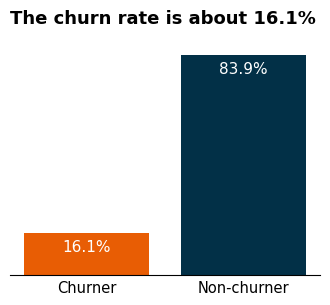

In [ ]:
# Group the data by churn flag.
churn_grp = train.groupby(['churn_flag'])[['churn_flag']].count().rename(columns={'churn_flag': 'count'}).reset_index()
churn_grp['pct'] = (churn_grp['count'] / churn_grp['count'].sum()) * 100
churn_grp = churn_grp.sort_values(by=['pct'])

# Define the plot.
fig, ax = plt.subplots(figsize=(4, 3))

# Plot the barplot.
bars = ax.bar(x=churn_grp['churn_flag'], height=churn_grp['pct'], color=['#e85d04', '#023047'])

# Customize the plot.
ax.set_title('The churn rate is about 16.1%', fontweight='bold', fontsize=13, pad=15, loc='left')
ax.set_xlabel('')
ax.set_xticks(ticks=range(2), labels=['Non-churner', 'Churner'], fontsize=10.5)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.invert_xaxis()

ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.1f}%'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),
                textcoords="offset points",
                ha='center', va='center',
                fontsize=11, color='white')

The target is imbalanced. 16.1% of the customers are churners. Thus, I will adopt some strategies in order to deal with this. They are:

- Stratified hold-out and k-fold cross validation in order to maintain the target proportion on test and validation sets, even for hyperparameter tuning.
- Define different class weights for majority and minority class instances. The idea is to define higher weights to minority class, such that the model will be penalized when mistakenly classifying a churner customer. These weights are defined on the model specific hyperparameter for it.
- Take a look at precision-recall trade-off if necessary. The main objective here is to predict churn probabilities, not a binary prediction. This will enable the bank to make better informed decisions. Instead of simply assessing if a client will attrit or not, it can check how likely he is to skip the service.

### Numerical features distributions
I will look at numerical features distributions below in order to see if there are skewed distributions and which are the most common values for the bank's customers numeric attributes.

In [ ]:
# To understand the distribution of data for all numerical features
numplots_features = ['customer_age',
                     'months_on_book',
                     'credit_limit',
                     'total_revolving_bal',
                     'avg_open_to_buy',
                     'total_amt_chng_q4_q1',
                     'total_trans_amt',
                     'total_trans_ct',
                     'total_ct_chng_q4_q1',
                     'avg_utilization_ratio',
                     'total_relationship_count']

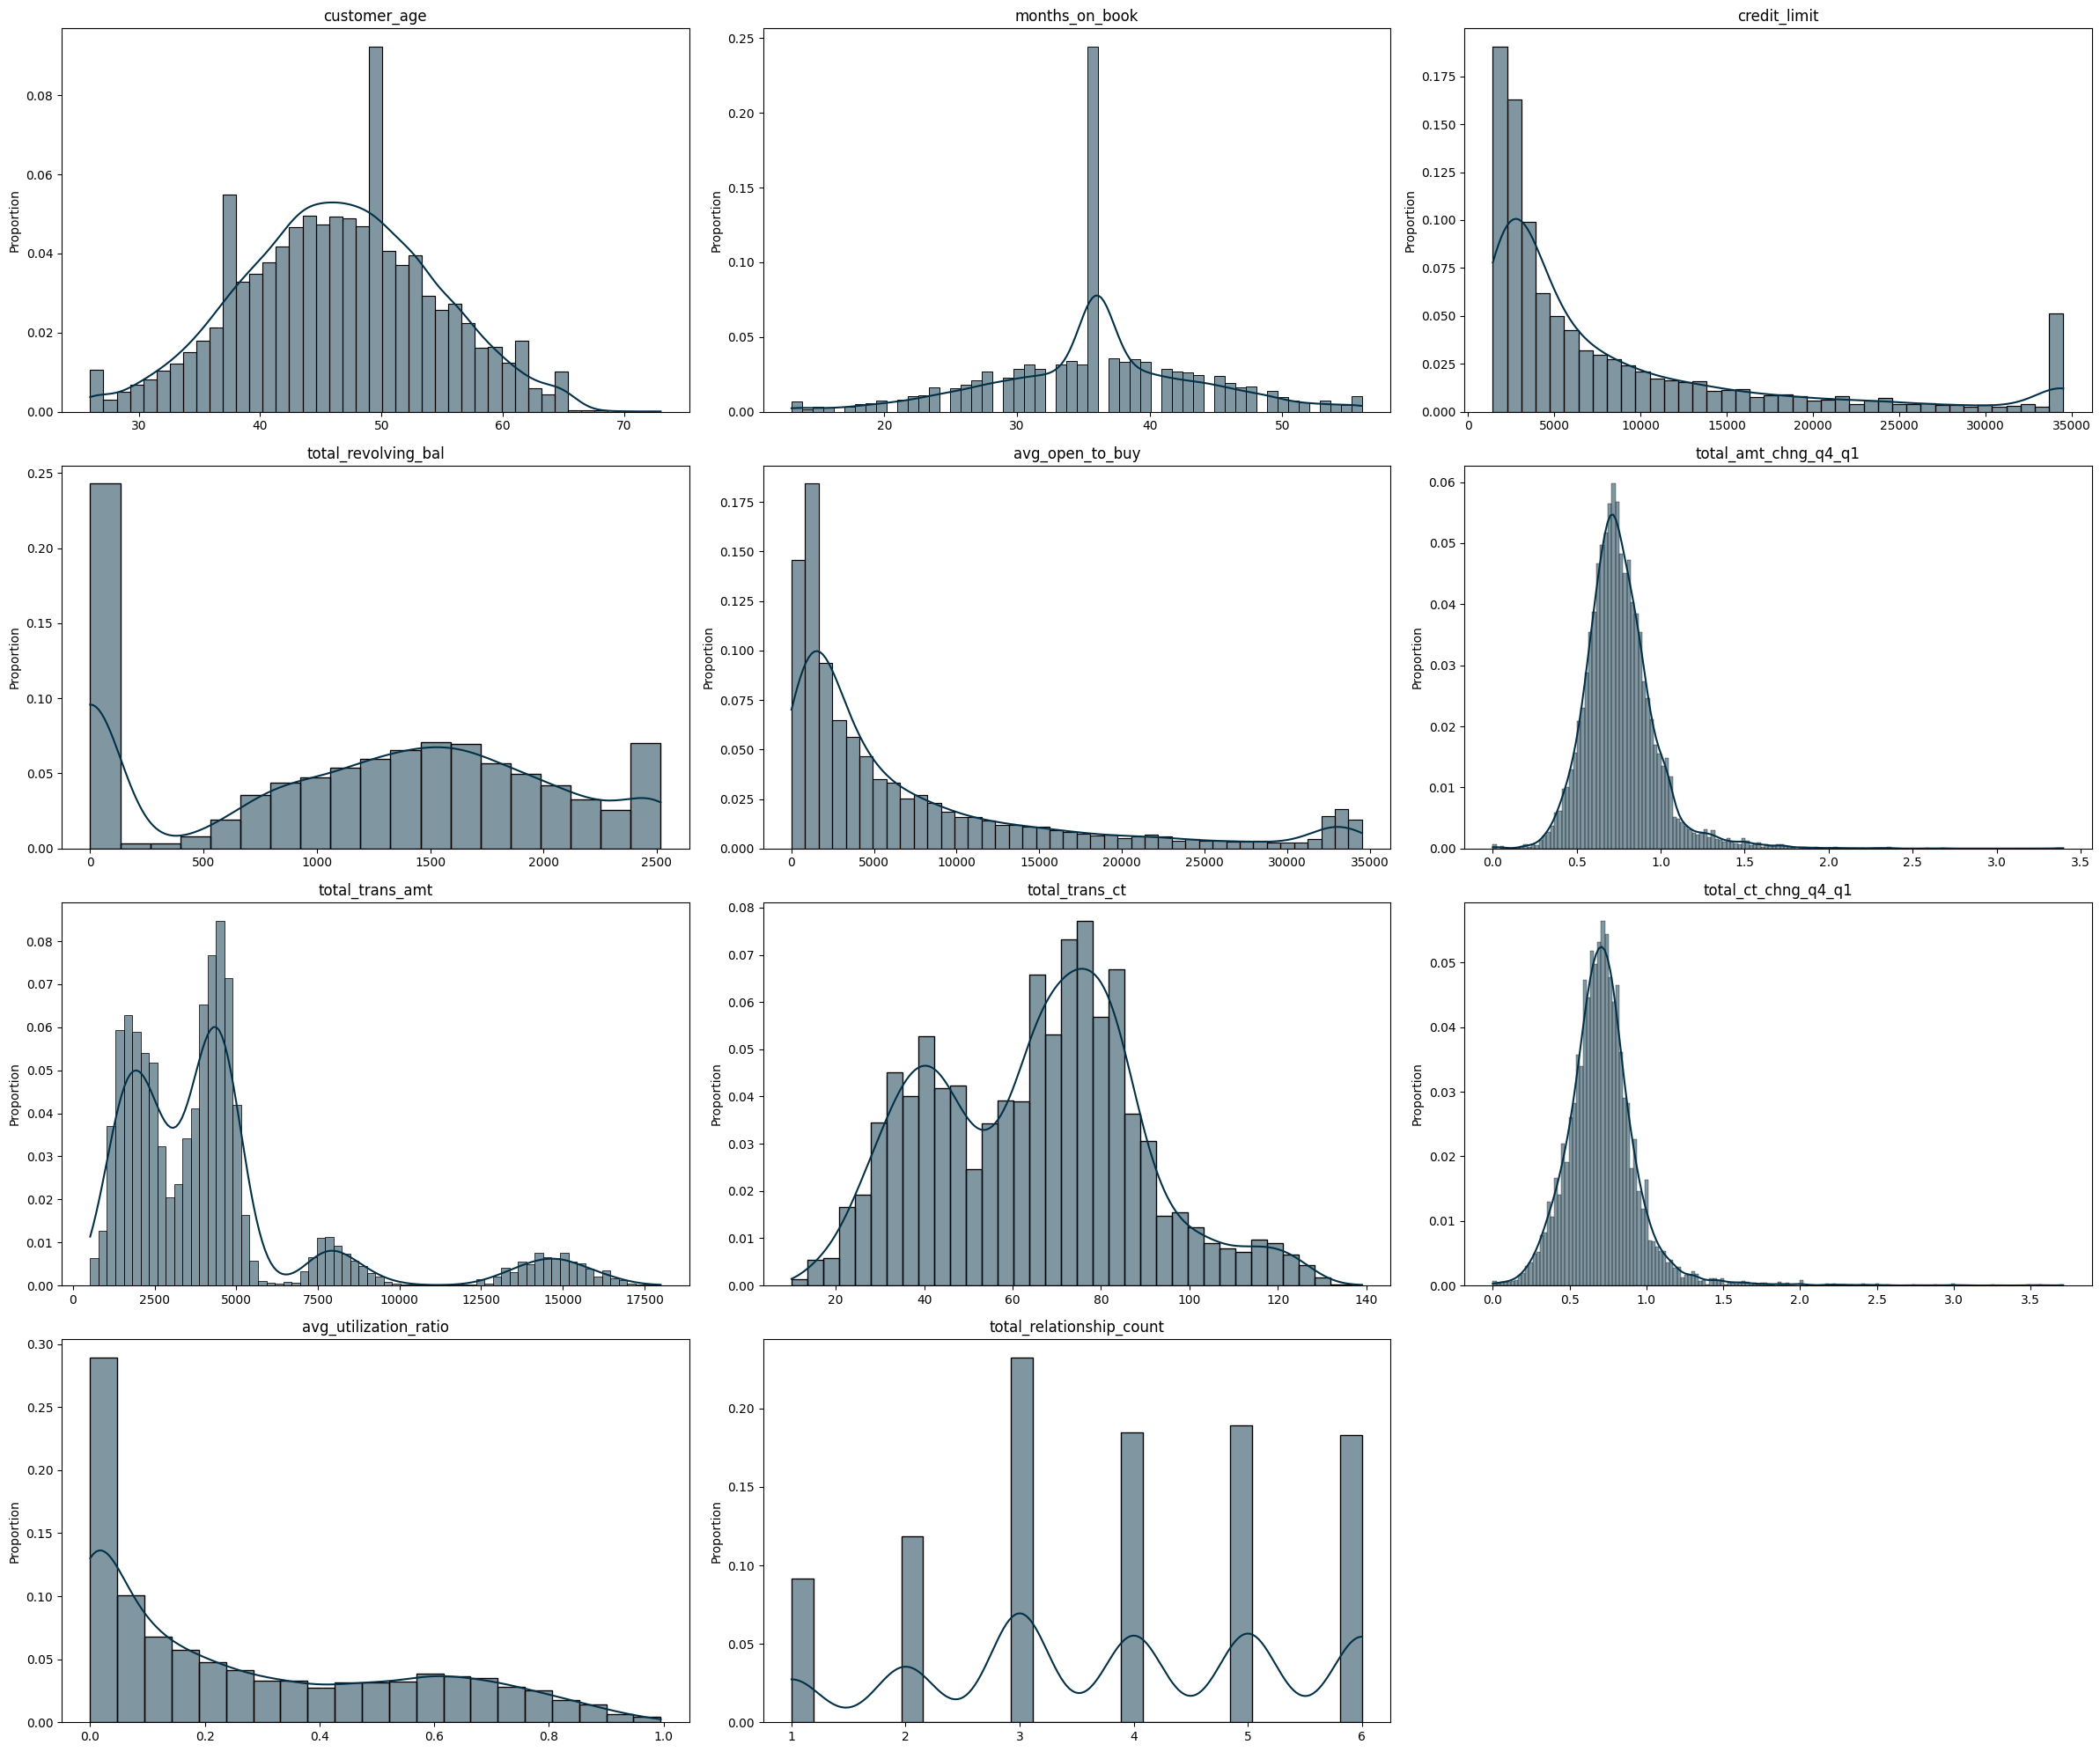

In [ ]:
# Create a analysis_plot with custom size
analysis_plots(data=train, features=numplots_features, kde=True, figsize=(24, 20))

**Insights:**
- Most of the customers are between 40 and 50 years old.
- A large part of the customers spent 36 months consuming the bank's credit card services.
- The credit limit is right-skewed. This means that the majority of customers have low credit limits, while there are relatively few customers with high credit limits. However, it is possible to see that a significant portion of them, about 5%, has a high credit limit, around 35,000. Moreover, both avg_open_to_buy and avg_utilization_ratio are also positively skewed.
- The bank must be alert to the distribution of the average utilization ratio. Being right-skewed means that most customers have a low utilization of the service. Particularly, a large part of them, about 25%, present zero utilization ratio. Therefore, the company must plan strategies to increase utilization and, consequently, revenue.
- A large portion of the customers, also about 25%, have a zero total revolving balance. Lower total revolving balances (specially zero) might indicate a significant likelihood of churn. Considering average utilization ratio and total revolving balance present the same proportion of zero records, these variables might be correlated. I will investigate this further in the analysis.
- Total transaction count and amount distributions seem to have two peaks. There must be a distinction in these distributions with respect to churn flag, which I will investigate further in the analysis. Moreover, a large part of the customers made around 80 or 40 transactions in the last 12 months. Transaction amounts about 5,000 and 2,500 were common.
- About 80% of the customers held at least 3 products of the bank.

### Outliers
I will look at outliers in the data in order to see if they represent inconsistent information like measurement errors. Once I do this, I will decide if I will treat them or not. Moreover, I will plot boxplots below for visualization purposes.

**Defining function to check outliers**

In [ ]:
def check_outliers(data, features):
    '''
    Check for outliers in the given dataset features.

    This function calculates and identifies outliers in the specified features
    using the Interquartile Range (IQR) method.

    Args:
        data (DataFrame): The DataFrame containing the data to check for outliers.
        features (list): A list of feature names to check for outliers.

    Returns:
        tuple: A tuple containing three elements:
            - outlier_indexes (dict): A dictionary mapping feature names to lists of outlier indexes.
            - outlier_counts (dict): A dictionary mapping feature names to the count of outliers.
            - total_outliers (int): The total count of outliers in the dataset.

    Raises:
        CustomException: If an error occurs while checking for outliers.

    '''

    try:

        outlier_counts = {}
        outlier_indexes = {}
        total_outliers = 0

        for feature in features:
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)

            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
            outlier_indexes[feature] = feature_outliers.index.tolist()
            outlier_count = len(feature_outliers)
            outlier_counts[feature] = outlier_count
            total_outliers += outlier_count

        print(f'There are {total_outliers} outliers in the dataset.')
        print()
        print(f'Number (percentage) of outliers per feature: ')
        print()
        for feature, count in outlier_counts.items():
            print(f'{feature}: {count} ({round(count/len(data)*100, 2)})%')

        return outlier_indexes, outlier_counts, total_outliers

    except Exception as e:
        raise "Custom Exception Error"

In [ ]:
# Checking outliers
outlier_indexes, outlier_counts, total_outliers = check_outliers(data=train, features=numplots_features)

There are 3344 outliers in the dataset.

Number (percentage) of outliers per feature: 

customer_age: 2 (0.02)%
months_on_book: 450 (5.55)%
credit_limit: 784 (9.68)%
total_revolving_bal: 0 (0.0)%
avg_open_to_buy: 775 (9.57)%
total_amt_chng_q4_q1: 311 (3.84)%
total_trans_amt: 704 (8.69)%
total_trans_ct: 1 (0.01)%
total_ct_chng_q4_q1: 317 (3.91)%
avg_utilization_ratio: 0 (0.0)%
total_relationship_count: 0 (0.0)%


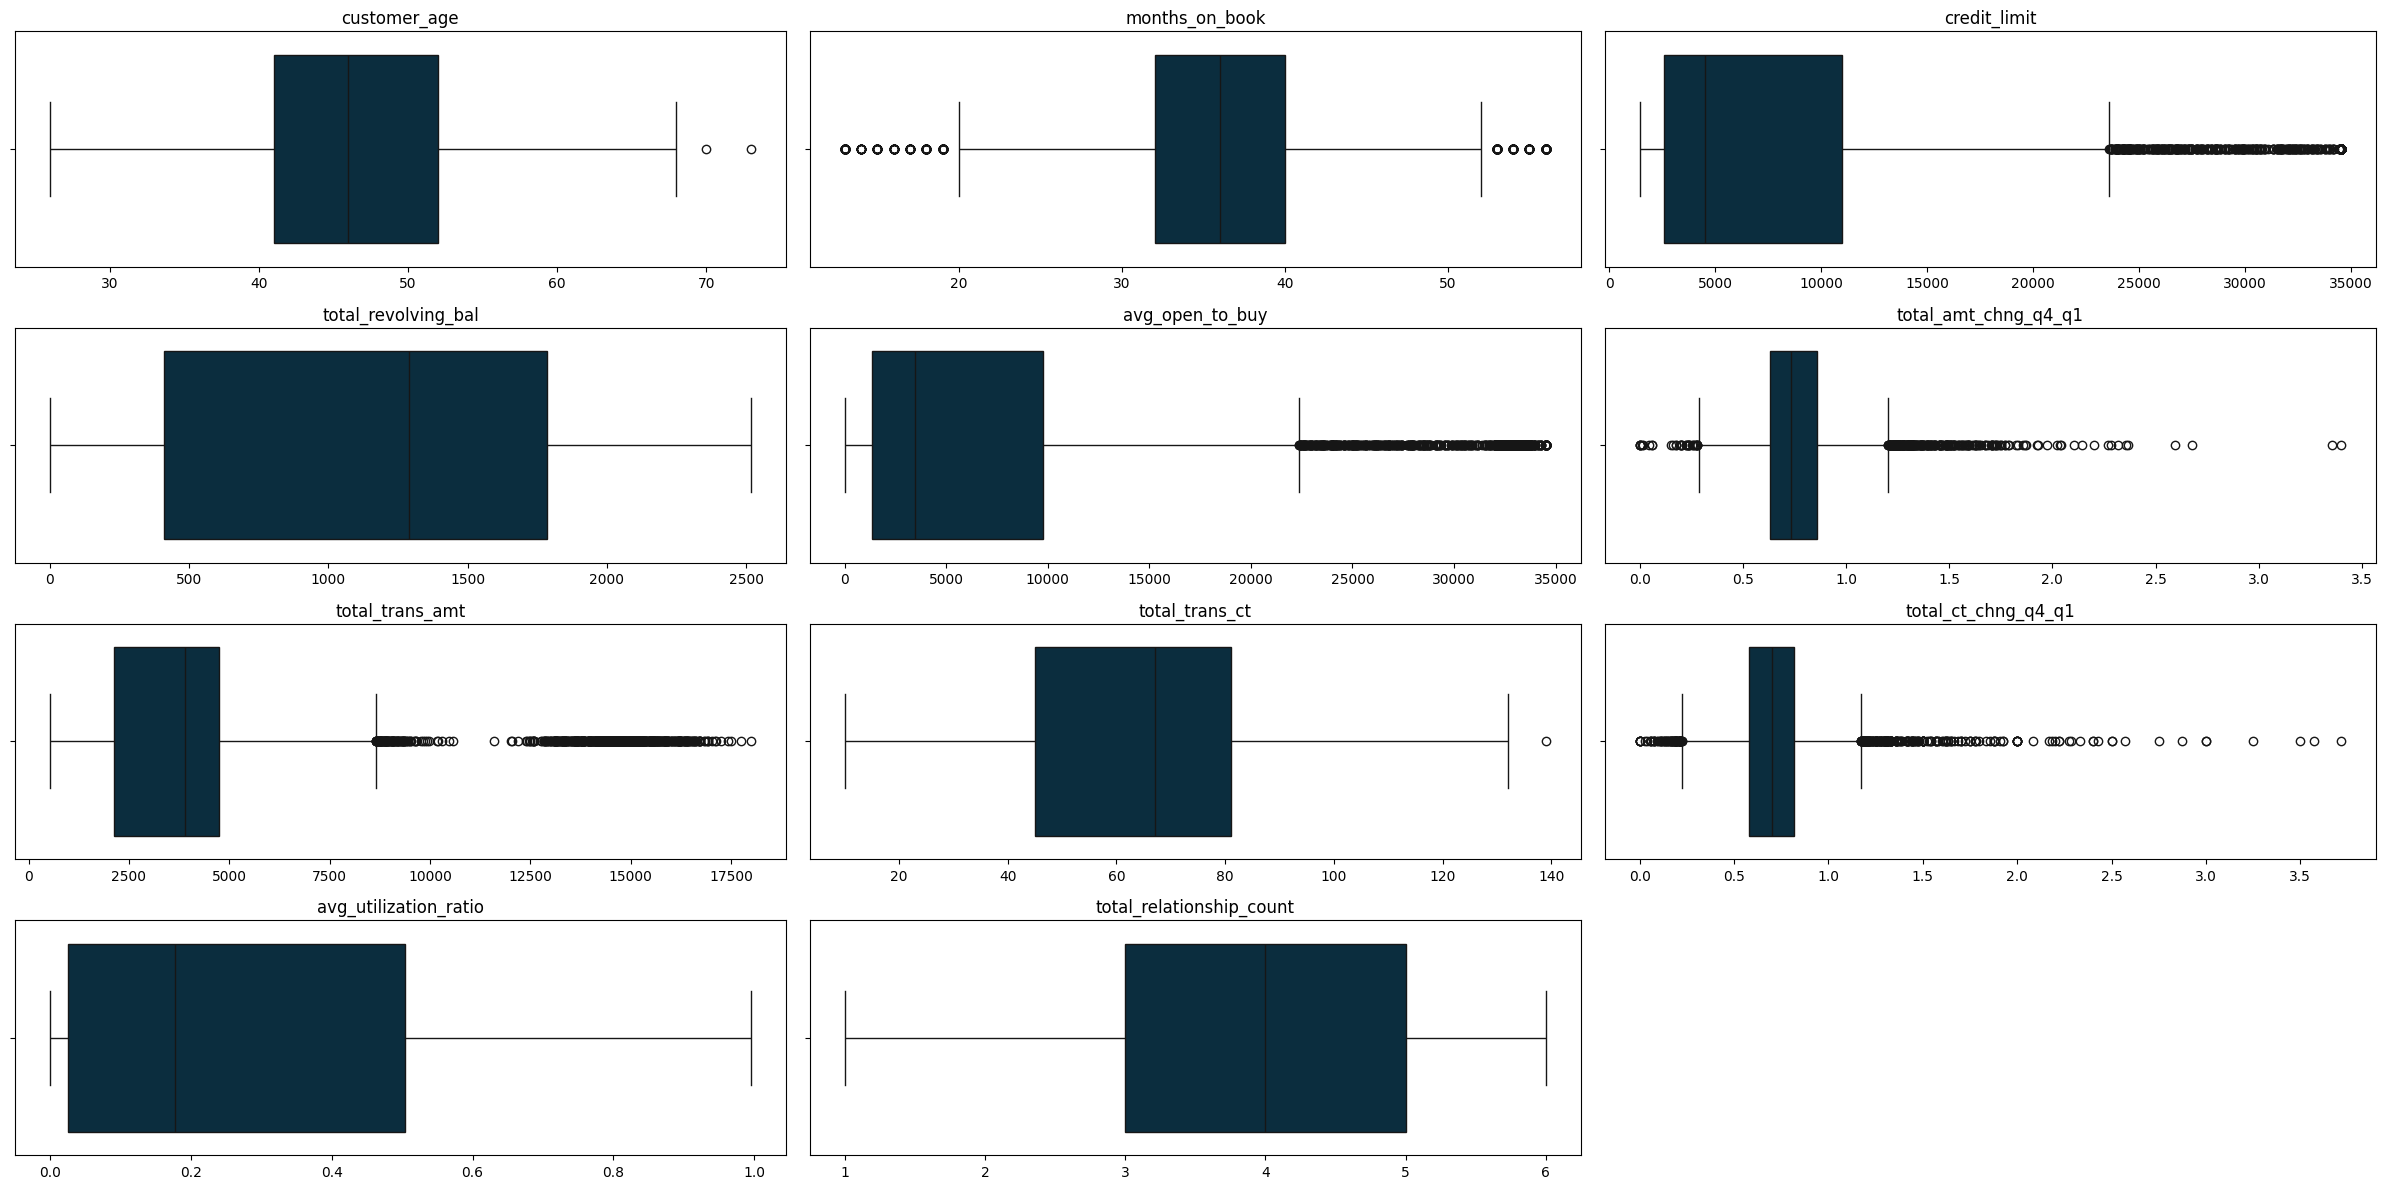

In [ ]:
# To Detect the outliers by using boxplot visualization
analysis_plots(data=train, features=numplots_features, outliers=True)

The outliers proportions are low in each feature. Moreover, once they don't represent inconsistent information like measurement errors, I will not remove them.

### Categorical features distributions
I will look at categorical features distributions below in order to assess which are the most common characteristics of the bank's customers. Moreover, I will include some discrete variables in these plots because it will be easier to visualize them in a countplot.

In [ ]:
# To understand the distribution of categorical vaiables in train set
barplot_discrete_features = ['gender',
                             'dependent_count',
                             'months_inactive_12_mon',
                             'contacts_count_12_mon']
barplot_features = barplot_discrete_features + categorical_features

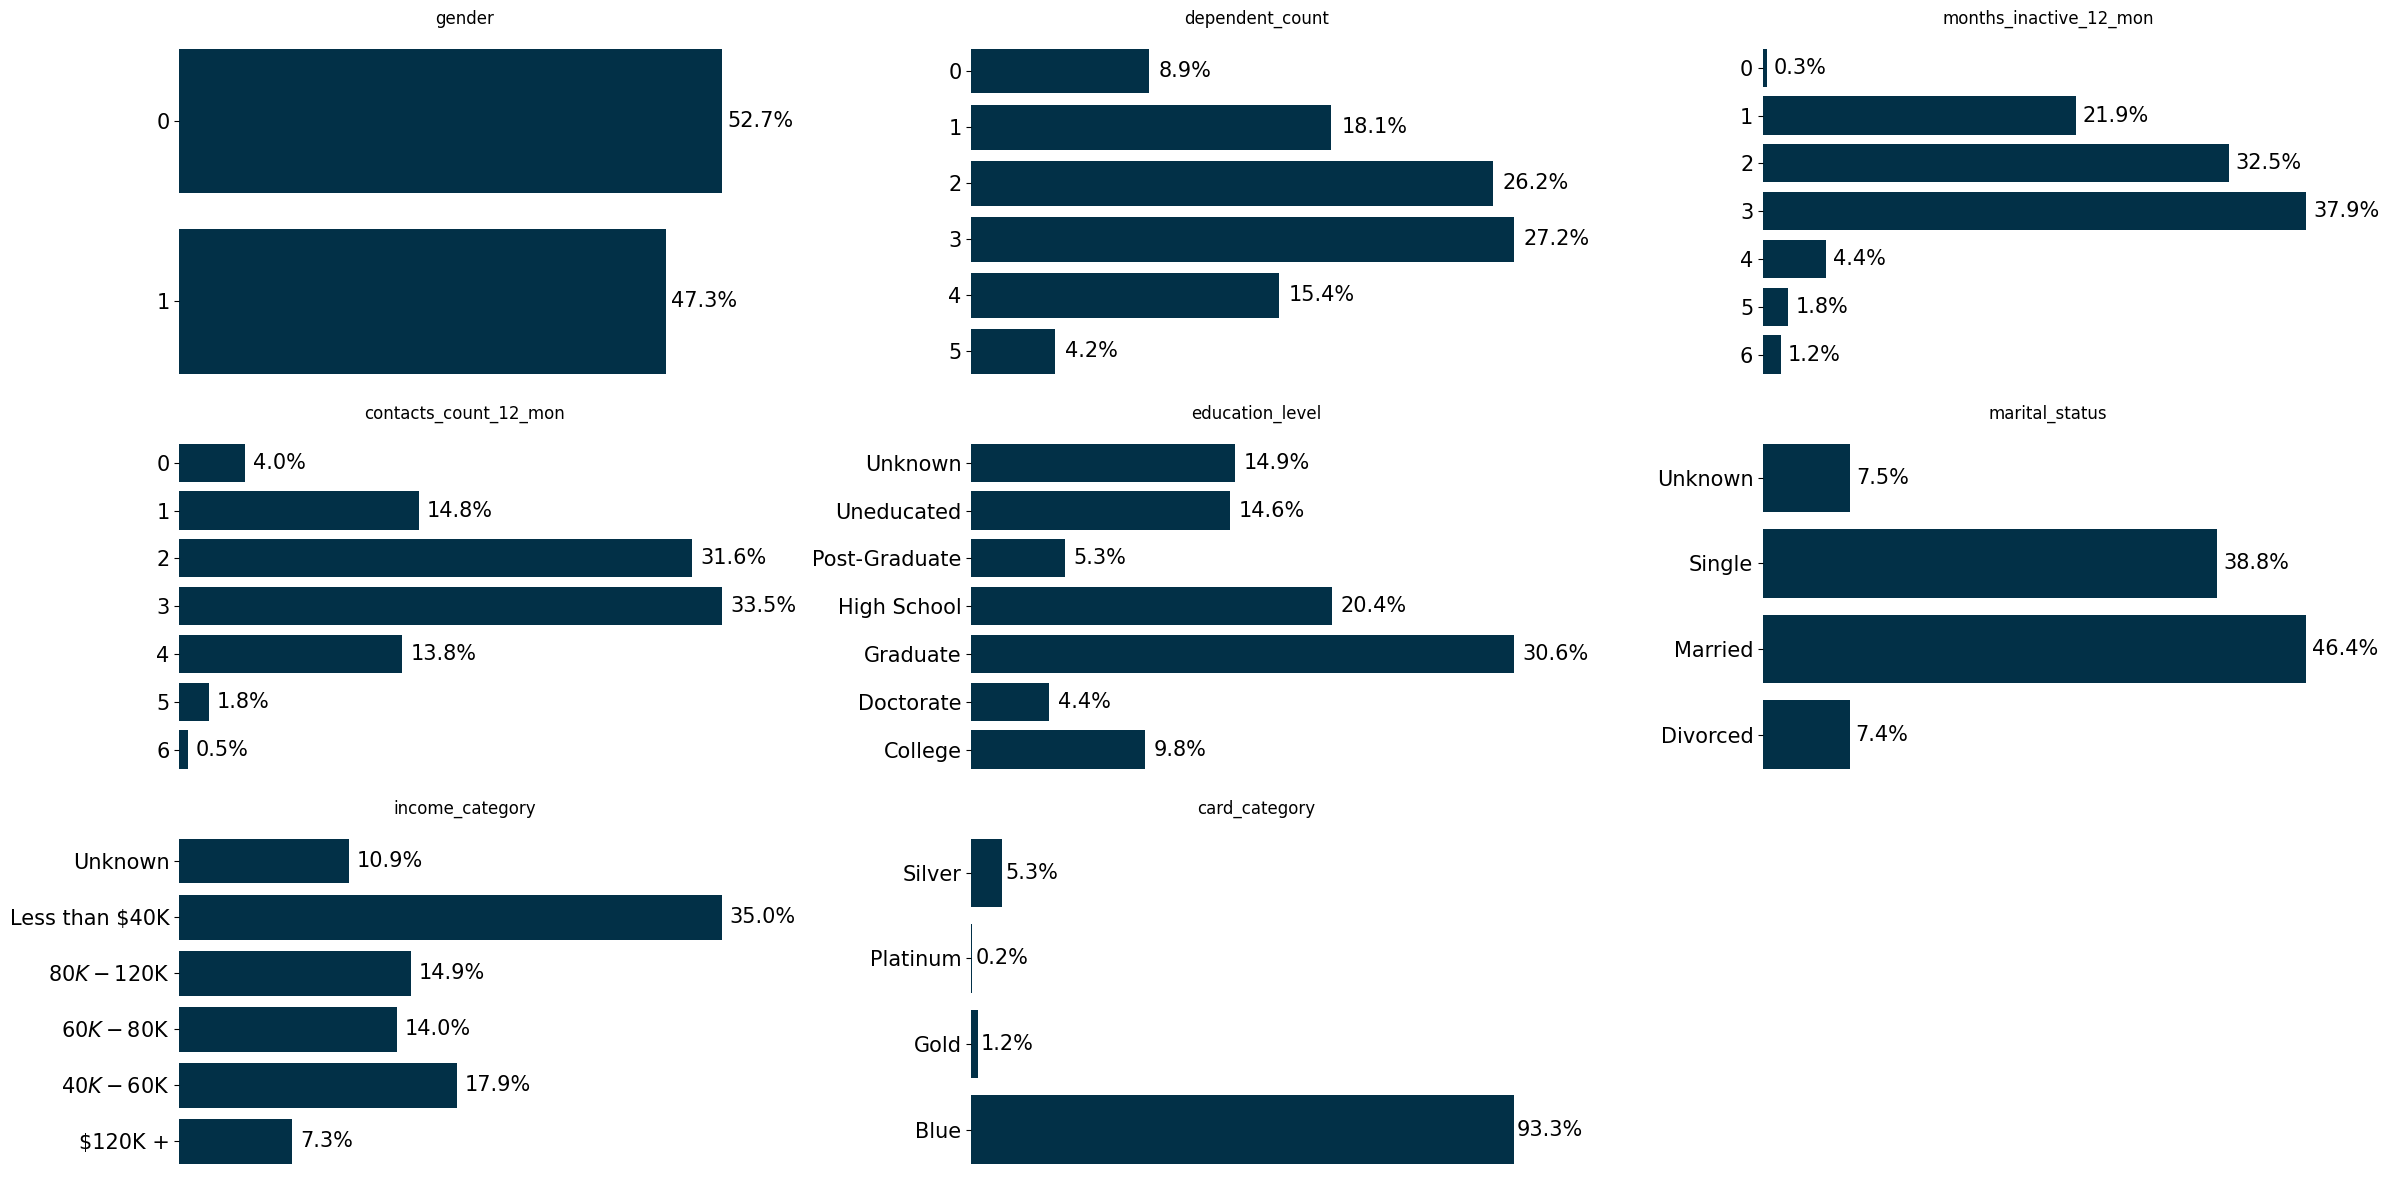

In [ ]:
# Create a barplot with custom size
analysis_plots(data=train, features=barplot_features, barplot=True, figsize=(24, 12))

**Insights:**
- Almost 53% of the customers are female.
- More than 50% of the customers have 2 or 3 dependents.
- 90% of the customers were inactive from 1 to 3 months in the last year. The bank must plan strategies not only to increase the utilization ratio, but also to avoid customer inactivity.
- Most of the customers (approximately 65% of them) contacted the bank 2 or 3 times in the last 12 months.
- Most of the customers are married or single, graduate, make less than $40K and hold a blue credit card.
- There are some categories with extremely low proportions of observations, like 0 months inactive and 6 contacts count in the last 12 months. Moreover, card category is highly imbalanced, with almost 99% of the customers having blue or silver types. Particularly, blue corresponds to 93.3% of the observations. This will be taken into account in the modeling step. Leaving categories with extremely low proportions of observations can lead to overfitting and card category may not have discriminatory power.

### Bivariate and multivariate analysis
I will do bivariate and multivariate analysis below in order to see how the features are related to each other, particularly with the target variable (churn_flag).

### Correlation matrix
I will examine the correlation matrix in order to identify any linear relationships between the features in the data, particularly with the target variable, and assess the strength and direction of these relationships.

In [ ]:
# Calculate correlation between the numerical variables
corr_matrix = train.corr(numeric_only=True)

In [ ]:
# Calculate the correlation value for target variable
corr_matrix['churn_flag'].sort_values(ascending=False)

,churn_flag
churn_flag,1.000000
contacts_count_12_mon,0.205486
months_inactive_12_mon,0.157937
dependent_count,0.030940
customer_age,0.017256
months_on_book,0.008124
avg_open_to_buy,0.000161
credit_limit,-0.023976
gender,-0.042009
total_amt_chng_q4_q1,-0.129157


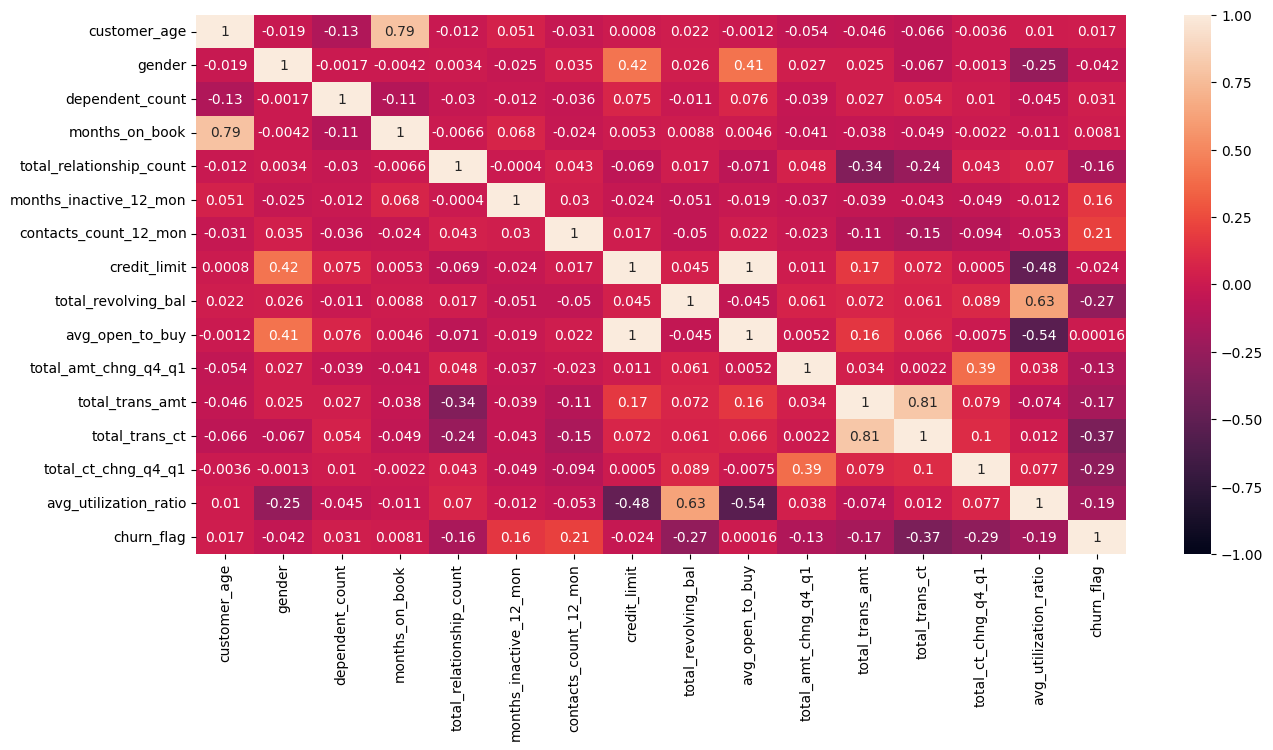

In [ ]:
# create a figure with custom size
plt.figure(figsize=(15, 7))

# Create a heatmap
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

# Display the chart
plt.show()

**Insights:**
- Total transaction count, total revolving balance and total count change have a moderate negative correlation with the target. This makes total sense. The less transactions a customer makes, the more he is likely to churn. Also, customers with lower revolving balances and less variation in their transaction counts are prone to churn due to inactivity.
- Customer age and months on book are strongly positively correlated. The older a customer is, the more time he spends consuming the bank's credit card services and vice-versa. Thus, the company must focus its efforts on retaining the old loyal customers and increase the tenure of younger ones.
- Credit limit and average utilization ratio are moderately negatively correlated. The higher the customer's credit limit, the lower the average utilization ratio.
- Total revolving balance and average utilization ratio are strongly positively correlated. This makes sense. As a customer uses more his credit card, he will have to pay higher revolving balances.
- Curiously, gender has a moderate positive correlation with credit limit. This may indicate that male customers tend to have higher credit limits than female ones.
- Some features that are naturally related are highly correlated, as expected. This is the case for total transaction amount and total transaction count. When building linear models, we have to worry with multicolinearity issues, which occurs when two or more independent variables are highly correlated. Although it is diagnosed with variance inflation factor, observing pearson correlation between pairs can indicate us this issue. It is the case here. However, once I will focus on predictive power, using more robust algorithms like LightGBM, I will not worry with this now.
- Curiously, average open to buy and credit limit are perfectly positively correlated. This means these two variables have a strong and consistent linear relationship in the same direction. This makes sense since open to buy means the amount left in your credit card to use and limit means the used amount which hasn't been paid off yet. Because they present this perfect correlation, one of them becomes redundant. Thus, I will drop avg_open_to_buy in the modeling step because credit_limit is more informative.

Let's look at some of these relationships below.

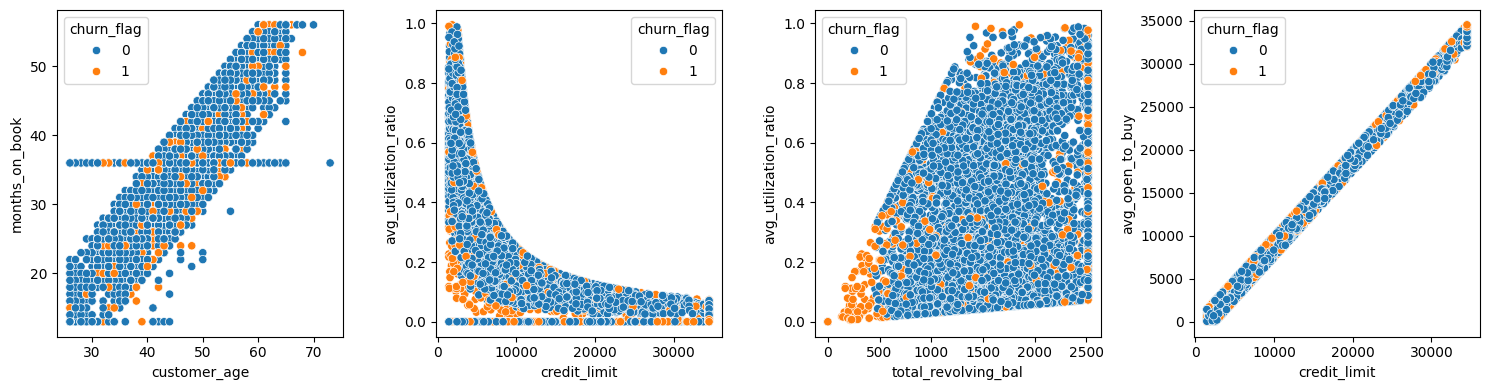

In [ ]:
# Create a subplot with custom size
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

# Create a scatter plot
sns.scatterplot(data=train, x='customer_age', y='months_on_book', hue='churn_flag', ax=axes[0])
sns.scatterplot(data=train, x='credit_limit', y='avg_utilization_ratio',  hue='churn_flag', ax=axes[1])
sns.scatterplot(data=train, x='total_revolving_bal', y='avg_utilization_ratio',  hue='churn_flag', ax=axes[2])
sns.scatterplot(data=train, x='credit_limit', y='avg_open_to_buy',  hue='churn_flag', ax=axes[3])

# Adjust the subplot params
plt.tight_layout()

# Display the chart
plt.show()

Curiously, credit limit and average utilization ratio present an exponential decreasing relationship! This indicates that, as credit limit increases, the average utilization ratio decreases at an exponential rate. Thus, customers with higher credit limits use their credit cards less.

### Numerical features distributions by churn flag
I will look at attrited and existing customers numerical distributions below in order to see if there is any significant difference between them.

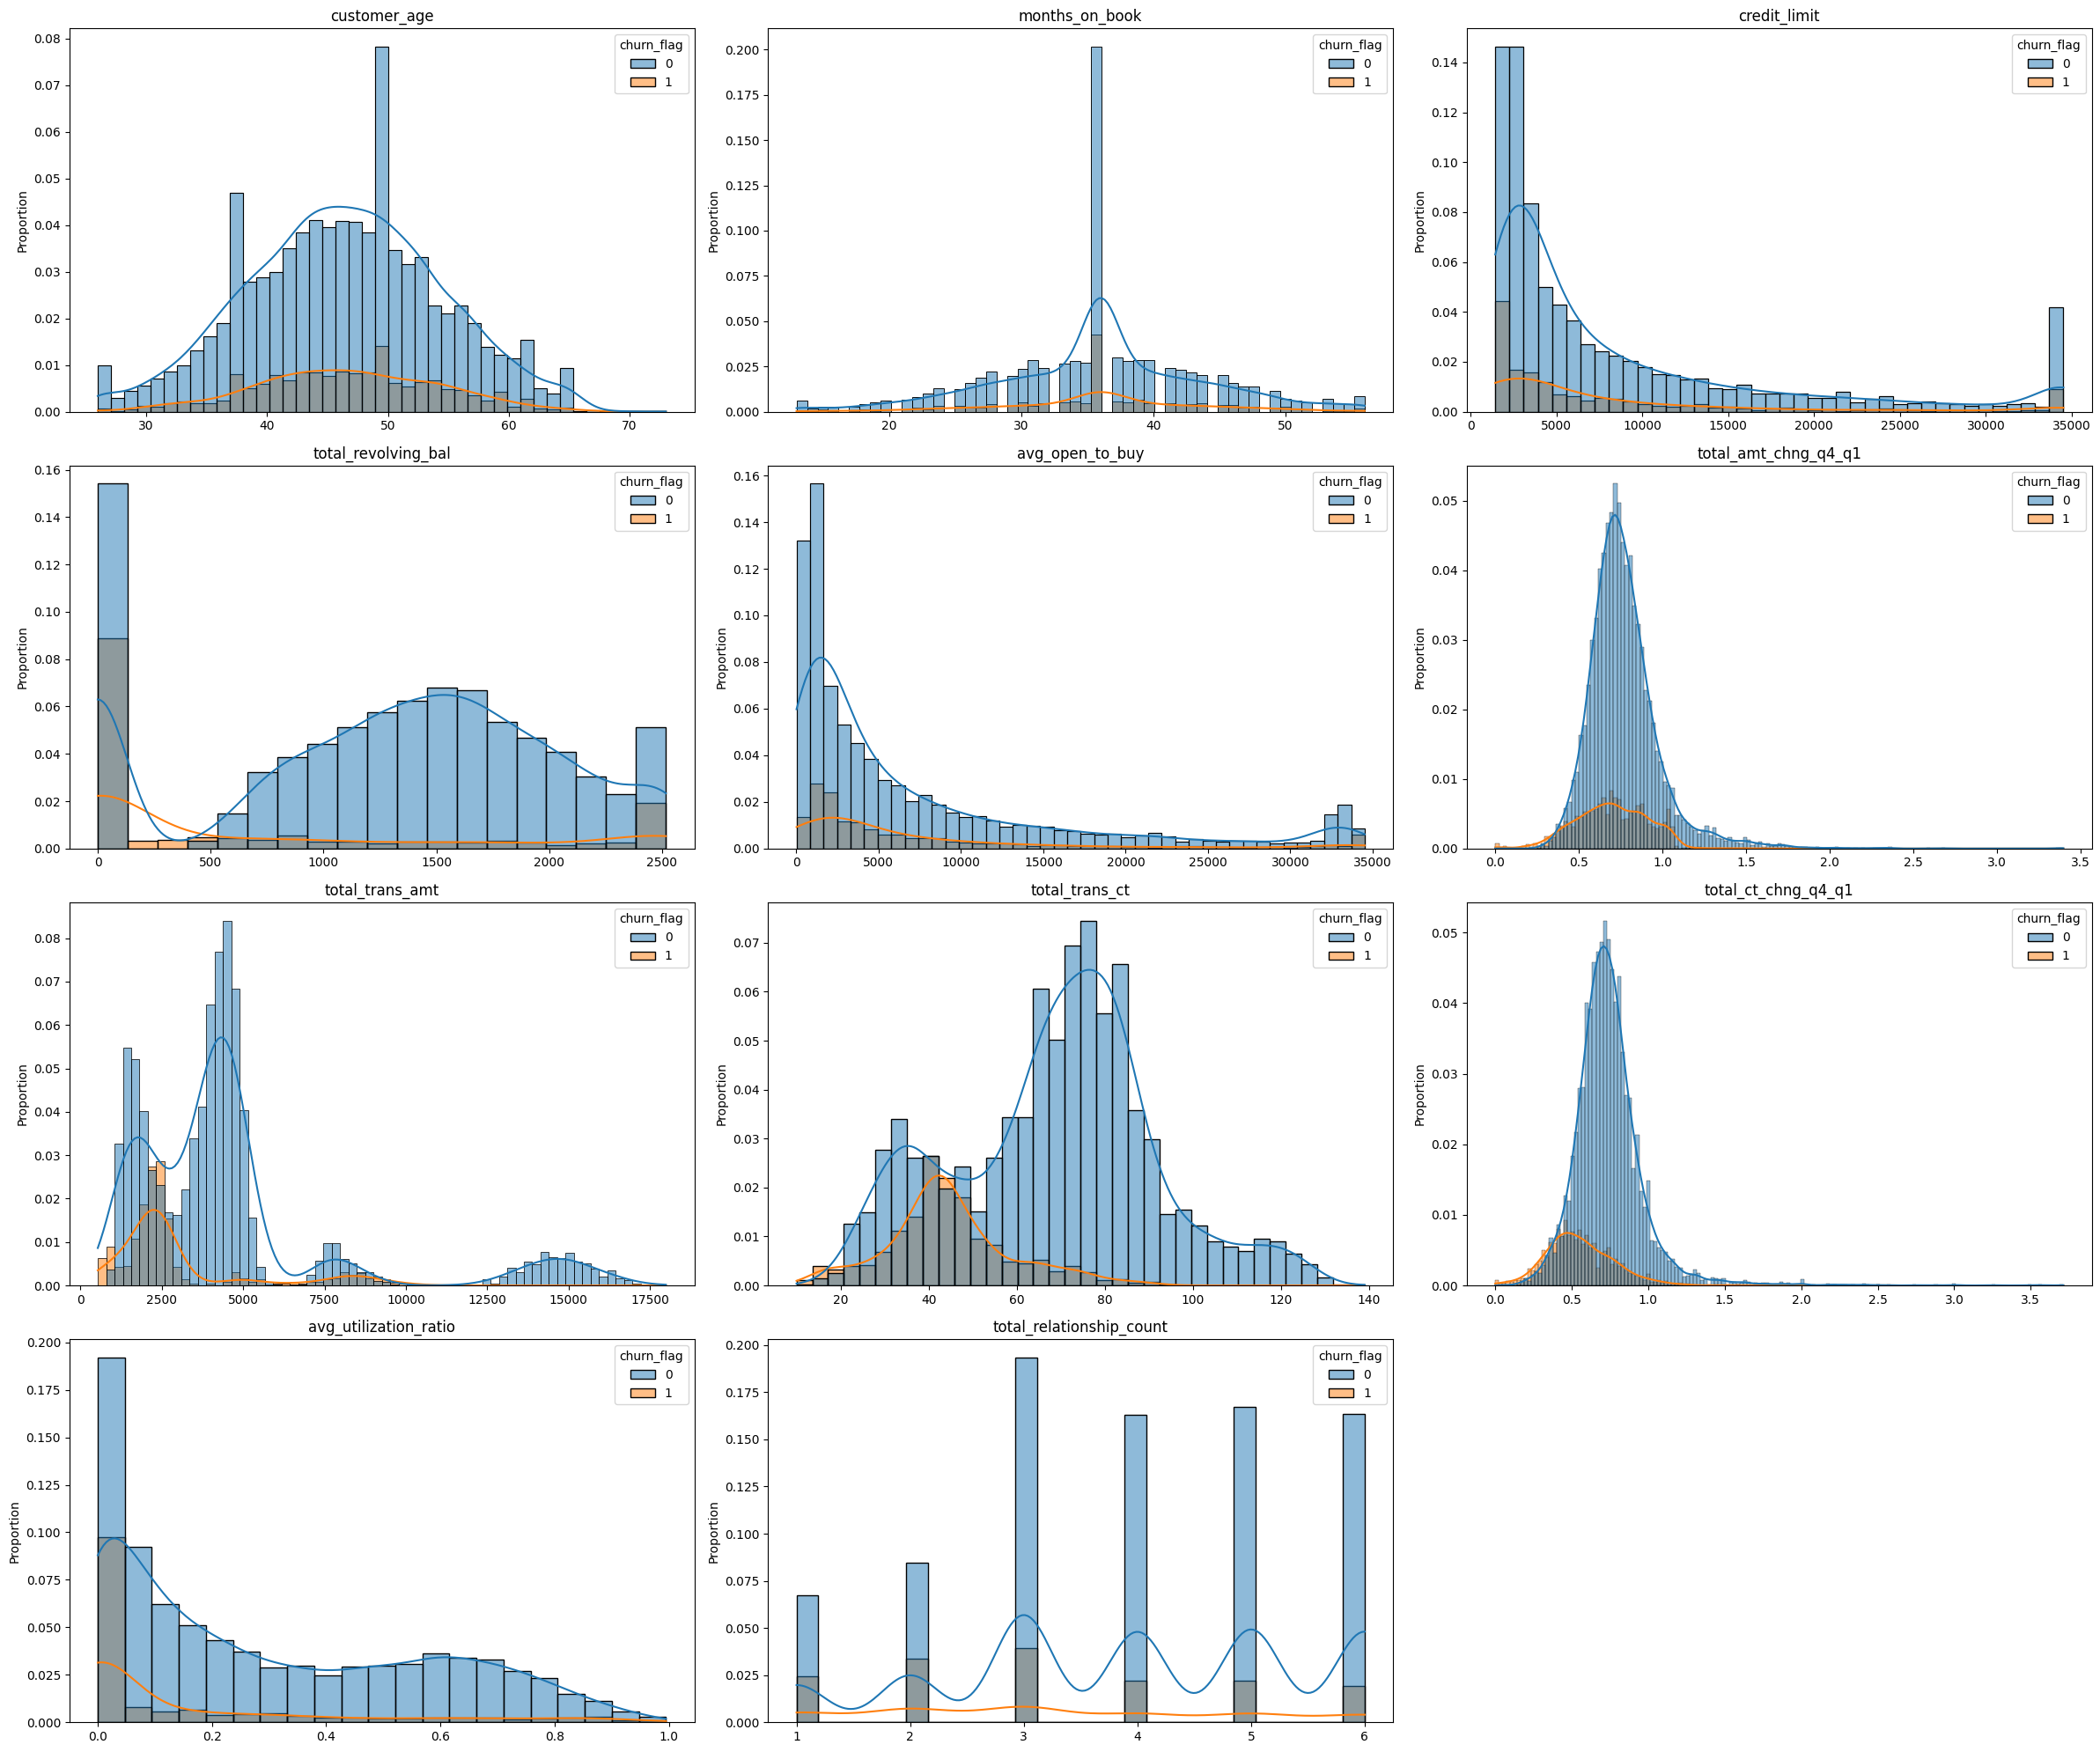

In [ ]:
# Create histogram plot for distribution of numerical features by churn flag
analysis_plots(data=train, features=numplots_features, histplot=True, kde=True, hue=target, figsize=(24, 20))

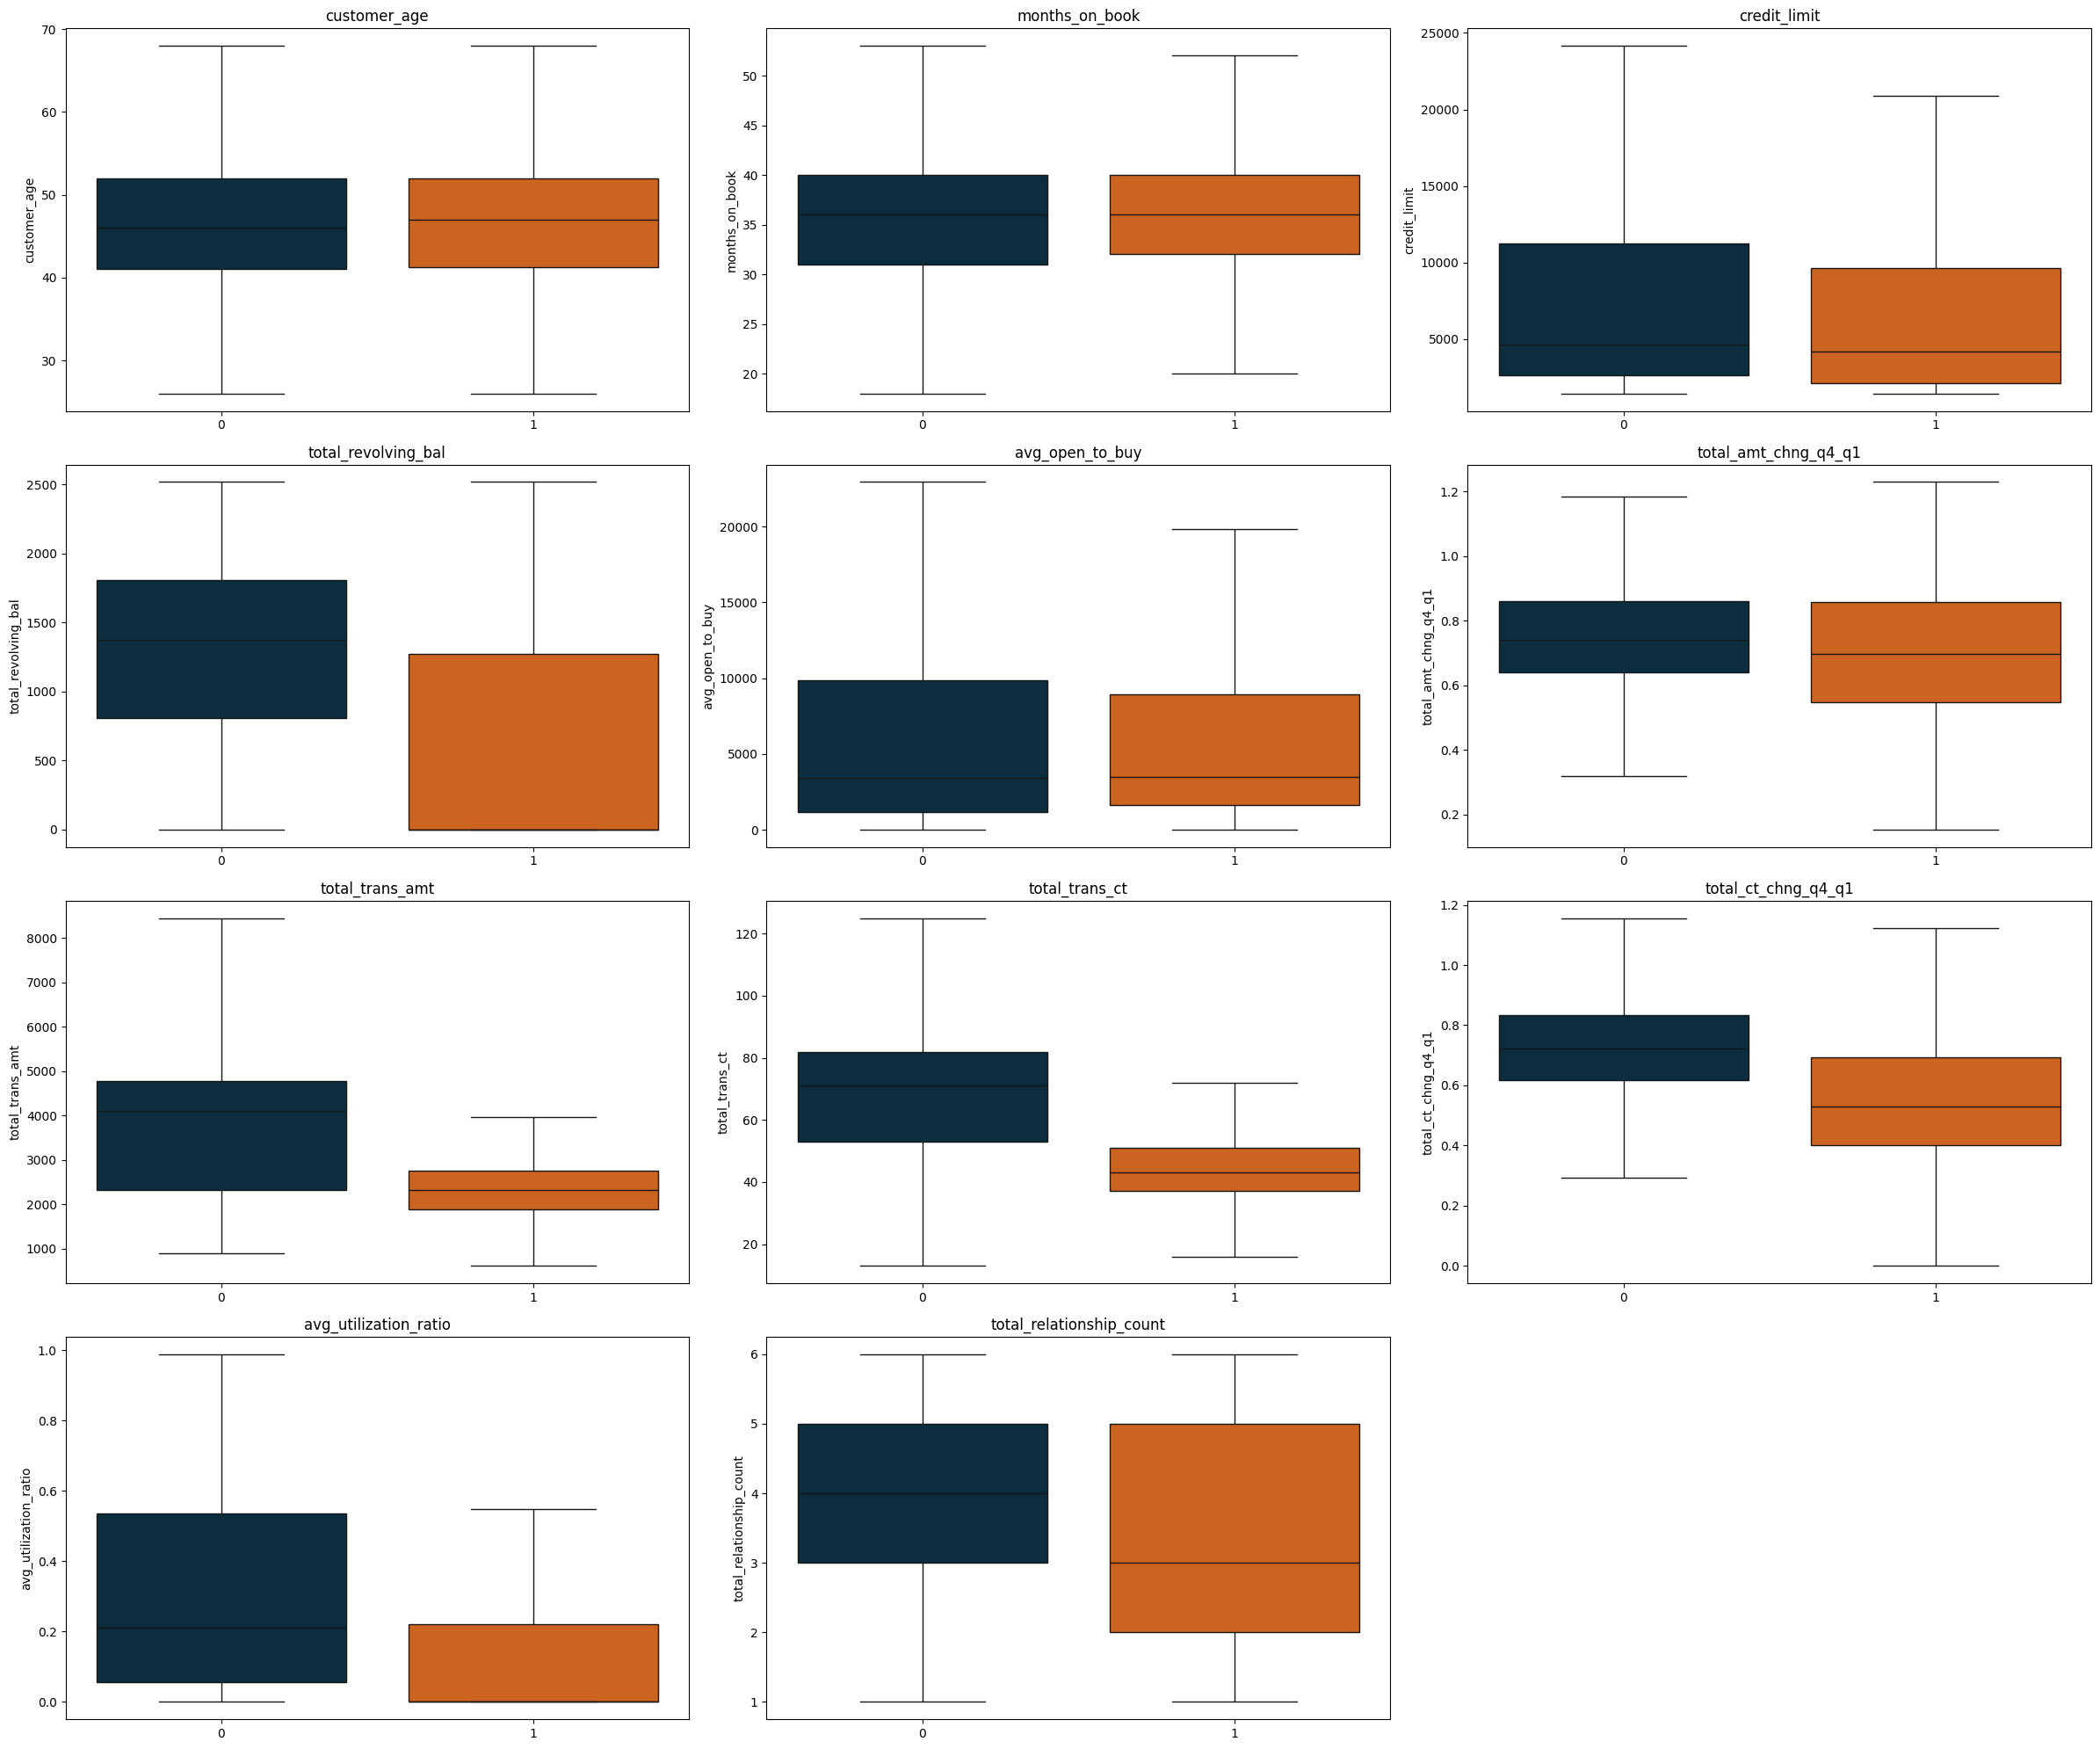

In [ ]:
# Create a Box plot to understand the numerical features by churn flag
analysis_plots(data=train, features=numplots_features, boxplot=True, boxplot_x=target, figsize=(24, 20))

**Insights:**
- Customers who churn tend to have fewer products from the bank. Attrited customers generally have between 1 and 3 products
- Customers who churn tend to have slightly lower credit limits.
- Customers who churn tend to have lower revolving balances, which makes sense since churners tend to use their credit cards less. Especially, a large part of them present a zero revolving balance.
- Customers who churn tend to have lower transaction amounts, which makes total sense. When a client is about to discontinue the service, he will make fewer transactions, resulting in lower amounts in a period.
- Customers who churn tend have lower transaction counts, which makes total sense. When a client is about to discontinue the service, he will make fewer transactions.
- Customers who churn tend to have lower changes in their transaction counts, which makes sense since making fewer transactions will reduce the variation in counts.
- As expected, customers who churn tend to have lower average utilization ratio. Particularly, many of them tend to have a zero utilization ratio.
- An important observation is that a good pratice would be to discretize these continuous features to better analyze their distributions per churners and non-churners. However, with the graphs above we can clearly see a discrimination, and, as I intend to focus on predictive power, building more robust models such as LightGBM, in terms of preprocessing, feature discretization would increase dimensionality and probably be harmful.

### Categorical features distributions by churn rate
I will look at how the churn rate is distributed over different categorical variables categories in order to assess which are the categories with higher proportions of churners.

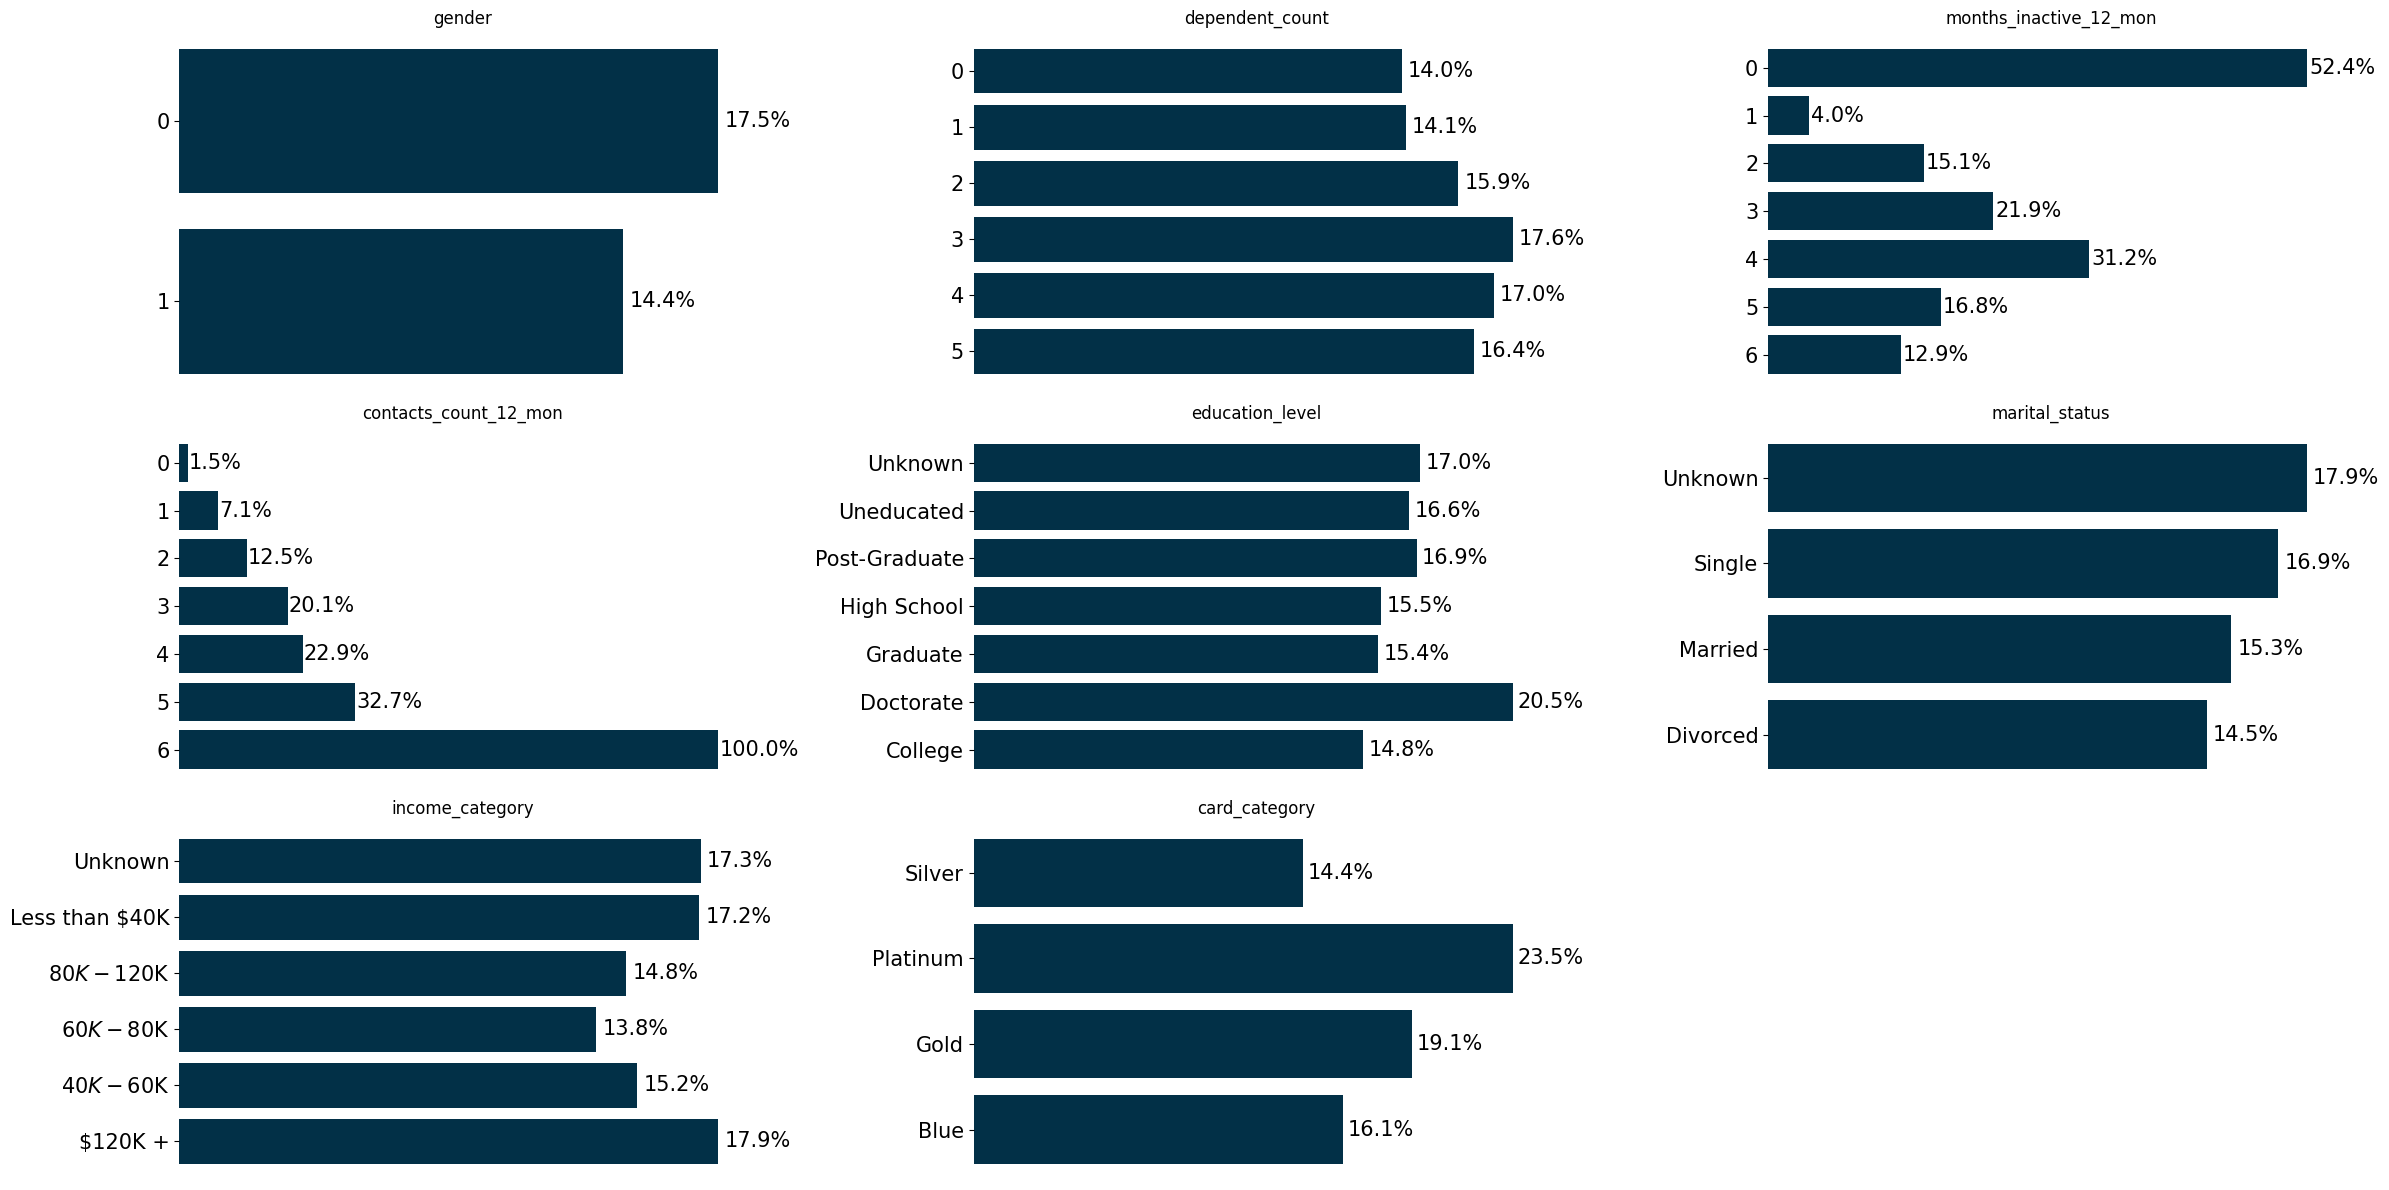

In [ ]:
# Create a barplot to understand the distribution of categorical variable by churn rate
analysis_plots(data=train, features=barplot_features, barplot=True, figsize=(24, 12), hue=target, text_y=0.2)

**Insights:**
- The churn rate consistently increases monotonically as the number of contacts with the bank rises. Especially, all customers who made six contacts churned.
- In marital_status, the unknown category presents the highest churn rate. For education_level and income_category, it presents the second highest churn rates. Thus, it is a good practice to leave it as another category of these variables in the preprocessing step, once it helps discriminating between churners and non-churners.
- Although card_category is highly imbalanced towards blue type, it is possible to see that the churn rate varies across the categories. Particularly, Platinum presents the highest churn rate. Even having a very low number of observations, as I am focusing on the predictive power, building robust models such as LightGBM, I will leave this variable and assess its feature importance or apply a feature selection method to keep it or remove it further.
- The churn rate is higher for women.
- Surprisingly, customers who were never inactive in the last 12 months present the highest churn rate.
- Customers with doctorate educational level present the highest churn rate among the other levels.


### EDA conclusions

<b>Main Insights:</b>
- The bank must be alert to the distribution of the average utilization ratio. Being right-skewed means that most customers have a low utilization of the service. Particularly, about 25% of them present zero utilization ratio. Therefore, the company must plan strategies to increase utilization and, consequently, revenue.
- 90% of the customers were inactive from 1 to 3 months in the last 12 months. The bank must plan strategies not only to increase the utilization ratio, but also to avoid customer inactivity.
- 75% of the customers contacted the bank at least 2 times in the last 12 months. The bank must pay attention to this and discover the reasons why customers are calling. Are they dissatisfied with the credit card service? If so, what specifically is causing their dissatisfaction?
-  Customer age and months on book are strongly positively correlated. The older a customer is, the more time he spends consuming the bank's credit card services and vice-versa. Thus, the company must focus its efforts on retaining the old loyal customers and increase the tenure of younger ones.
- Credit limit and average utilization ratio present an exponential decreasing relationship! This indicates that, as credit limit increases, the average utilization ratio decreases at an exponential rate. Thus, customers with higher credit limits use their credit cards less.
- Customers who churn tend to have lower credit limits, revolving balances, transaction amounts, transaction counts, changes in transaction counts, and average utilization ratios (actually, many of them present a zero utilization ratio). This makes total sense because when a client is about to discontinue the service, he will make fewer transactions, resulting in lower values of these attributes.
- The churn rate consistently increases monotonically as the number of contacts with the bank rises. Especially, all customers who made six contacts churned. Also, customers with doctorate educational level present the highest churn rate among the other levels.

### Build a Machine Learning Model

In [ ]:
# Read the dataset again
df = pd.read_csv(data_path)

In [ ]:
# To see the Glance of dataset, it prints first default 5 rows
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


- I will rename the columns in a standard format in order to turn the data manipulation easier. Attrition_flag will be renamed as churn_flag for interpretation purposes. Moreover, I will convert it to a binary format, in order to fit machine learning algorithms.

In [ ]:
# Convert all the columns names into standard form lowercase
df.columns = [x.lower() for x in df.columns]

In [ ]:
# Rename the column names
df.rename(columns={'attrition_flag': 'churn_flag'}, inplace=True)

# Converting the catergorical variable into binary format
df['churn_flag'] = df['churn_flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

### Split the data into train and test sets
- First of all, I will split the data into train and test sets.
- Test set is supposed to be data the model has never seen before.
- This split will avoid data leakage, which occurs when information from the test set or future data inadvertently leaks into the training process, leading to over-optimistic performance estimate, compromising the model's ability to generalize to new, unseen data.
- A good practice to protect the model against data leakage is perform fit_transform on training data and just transform on test data when applying preprocessing steps after the split.
- I will specify stratify=y so that the train_test_split function ensures that the splitting process maintains the same percentage of each target class in both the training and testing sets. This is particularly useful when dealing with imbalanced datasets, which is the case, as there are more existing customers than attrited ones.

In [ ]:
# For x data, we have to remove churn_flag column from the dataset
X = df.drop(columns=['churn_flag'])
# For response or target variable y, taking churn_flag column
y = df['churn_flag'].copy()

# Split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Print the train and test dataset dimension
print(f'Train predictor dataset shape: {X_train.shape}.')
print(f'Train target dataset shape: {y_train.shape}.')
print(f'Test predictor dataset shape: {X_test.shape}.')
print(f'Test target dataset shape: {y_test.shape}.')

Train predictor dataset shape: (8101, 22).
Train target dataset shape: (8101,).
Test predictor dataset shape: (2026, 22).
Test target dataset shape: (2026,).


In [ ]:
# Print the train dataset unique values and its count with normalization
print(f'Train target proportion: ')
print(f'{y_train.value_counts(normalize=True)}')
# print the test dataset unique values and its count with normalization
print(f'\nTest target proportion: ')
print(f'{y_test.value_counts(normalize=True)}')

Train target proportion: 
churn_flag
0    0.839279
1    0.160721
Name: proportion, dtype: float64

Test target proportion: 
churn_flag
0    0.839585
1    0.160415
Name: proportion, dtype: float64


The target classes proportions were preserved.

# 5. Feature engineering, data cleaning and preprocessing
In order to fit machine learning algorithms, it is necessary to apply some transformations to the data. There are no missing values in the data and the outliers don't represent inconsistent information. Thus, I will just need to apply preprocessing techniques, mentioned below.

Considering linear and tree-based models require distinct pre-processing techniques, I will build two preprocessors:
- For the tree-based models preprocessor, I will not apply any preprocessing technique to numerical features because these models don't require feature scaling. For the categorical features with ordinal relationships (education level, income category, and card category), I will apply ordinal encoding, in order to preserve this characteristic. For the remaining categorical feature (marital status), I will apply target encoding because one-hot encoding might be harmful for tree-based models due to the sparse representation and increased dimensionality. One-hot encoding will only be applied to gender, because it will be converted into a unique binary variable, not increasing dimensionality.
- For the linear models, I will apply standard scaling to numerical features because these algorithms utilize distance based calculations or optimization algorithms such as gradient descent, being sensitive to scale. For the categorical features, I will apply one-hot encoding. This is because linear models present the linearity assumption. Linear models take advantage from this encoding technique because, by creating dummies for each category, we treat them individually, assigning a distinct weight and making sure linearity is present - 1 when that category is present, else 0. An important observation is that, once I am focusing on predictive power, I will not spend much time searching for multicolinearity issues or discretizing numerical continuous variables (tasks for enhancing linear models performance, attending their assumptions) because my idea is to use a robust model such as LightGBM. I will test linear models just to see whether their performances beats this powerful gradient boosting algorithm. If that's the case, I would use them, balancing the computational cost.

Feature engineering:
- In order to extract the maximum information from the available features, I will do some feature engineering, which is already embedded in the preprocessor.
- I will create the following features:
    - Ratio features: products_per_dependent (total_relationship_count/dependent_count), trans_amt_per_dependent (total_trans_amt/dependent_count), trans_ct_per_dependent (total_trans_ct/dependent_count), trans_amt_per_products (total_trans_amt/total_relationship_count), trans_ct_per_products (total_trans_ct/total_relationship_count), avg_trans_amt (total_trans_amt/total_trans_ct), credit_util_rate (total_revolving_bal/credit_limit), proportion_inactive_months (months_inactive_12_mon/months_on_book), products_per_tenure (total_relationship_count/months_on_book), products_per_contacts (total_relationship_count/contacts_count_12_mon), dependents_per_contacts (dependent_count/contacts_count_12_mon), trans_ct_per_contacts (total_trans_ct/contacts_count_12_mon), products_per_inactivity (total_relationship_count/months_inactive_12_mon), dependents_per_inactivity (dependent_count/months_inactive_12_mon), trans_ct_per_inactivity (total_trans_ct/months_inactive_12_mon), trans_amt_per_credit_limit (total_trans_amt/credit_limit), age_per_tenure (customer_age/months_on_book), trans_ct_per_tenure (total_trans_ct/months_on_book), trans_amt_per_tenure (total_trans_amt/months_on_book).
    - Sum features: total_spending (total_trans_amt + total_revolving_bal), education_income_levels (education_level + income_category, ordinal), inactivity_contacts (contacts_count_12_mon + months_inactive_12_mon).
    - Considering these are numeric variables, all will be scaled to go for the stratified k-fold cross validation (models comparison) step.
    - Eventually, other features will be added. These features above can already capture hided relationships and patterns. Moreover, they make sense in the business context. This is something to take into account when performing feature engineering.
    
Considerations about some nuances seen in eda:
- I will leave the 'unknown' category in income_category, marital_status and education_level as another category of these variables. This is because I saw on eda that this category presents discrimination between churners and non-churners. Specifically, in marital_status, it presents the highest churn rate. For education_level and income_category, it presents the second highest churn rates. Thus, I will not do any imputation. Imputing would introduce bias and information loss.
- I will leave the card_category variable in the data because although it is highly imbalanced, it was observed that Gold and Silver category present some higher churn rates. Once I intend to build robust models such as LightGBM, focusing on predictive power, I will keep this variable and apply a feature selection method to remove it in case it is useless.
- I will drop avg_open_to_buy because I observed it is perfectly positively correlated with credit_limit, turning its information redundant.
- I will drop CLIENTNUM because it has a unique value for each record.
- I will drop two specific variables because I don't have access to what they mean, and they seem to be results of a Naive Bayes machine learning model.
- Again, I will not treat issues like multicolinearity because the focus is on building robust models such as LightGBM, trying to reach the maximum predictive power.

All the preprocessing mentioned above is done by transformer classes, which is defined below the functions. This enable us to integrate everything in a unique sklearn pipeline, facilitating the model deployment in production environment.

In [ ]:
# To see first 5 rows of the X_train dataset
X_train.head()

,clientnum,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1,naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2
2856,787504158,36,F,0,Unknown,Married,Less than $40K,Blue,24,4,...,2570.0,2230,340.0,0.686,1755,42,0.448,0.868,0.000170,0.99983
6515,718279008,44,M,3,High School,Single,$60K - $80K,Silver,36,5,...,25276.0,0,25276.0,0.849,2282,38,0.583,0.000,0.994300,0.00570
7141,771338658,46,M,2,High School,Married,$80K - $120K,Blue,30,6,...,11670.0,915,10755.0,0.892,4277,89,0.854,0.078,0.000105,0.99989
632,714529233,36,F,2,Graduate,Married,Less than $40K,Blue,24,3,...,3124.0,1593,1531.0,0.869,1652,41,0.367,0.510,0.000093,0.99991
3496,717582558,50,M,1,Graduate,Single,$120K +,Blue,40,4,...,34516.0,1185,33331.0,0.725,3874,72,0.714,0.034,0.000180,0.99982


Check numerical features.

In [ ]:
# select all the numerical columns and store it in a list
numerical_features = X_train.select_dtypes('number').columns.to_list()
print(f'There are {len(numerical_features)} numerical features.')
print('They are:')
# Print the numerical list
print(numerical_features)

There are 17 numerical features.
They are:
['clientnum', 'customer_age', 'dependent_count', 'months_on_book', 'total_relationship_count', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal', 'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt', 'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio', 'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1', 'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2']


Check categorical features cardinality and unique values.

In [ ]:
# select all the categorical features and store it in a list
categorical_features = X_train.select_dtypes('object').columns.to_list()
print(f'There are {len(categorical_features)} categorical features.')
print('They are: ')
# Print the categorical list
print(categorical_features)

There are 5 categorical features.
They are: 
['gender', 'education_level', 'marital_status', 'income_category', 'card_category']


In [ ]:
# Print the train unique values and its count with normalization
for feature in categorical_features:
    print(feature)
    print('-'*40)
    print(f'There are {X_train[feature].nunique()} unique values. They are: ')
    print(X_train[feature].value_counts(normalize=True))
    print()

gender
----------------------------------------
There are 2 unique values. They are: 
gender
F    0.527342
M    0.472658
Name: proportion, dtype: float64

education_level
----------------------------------------
There are 7 unique values. They are: 
education_level
Graduate         0.306382
High School      0.203679
Unknown          0.148994
Uneducated       0.146031
College          0.098259
Post-Graduate    0.052710
Doctorate        0.043945
Name: proportion, dtype: float64

marital_status
----------------------------------------
There are 4 unique values. They are: 
marital_status
Married     0.463523
Single      0.387853
Unknown     0.074682
Divorced    0.073941
Name: proportion, dtype: float64

income_category
----------------------------------------
There are 6 unique values. They are: 
income_category
Less than $40K    0.349586
$40K - $60K       0.178990
$80K - $120K      0.149241
$60K - $80K       0.140230
Unknown           0.109369
$120K +           0.072584
Name: proportion, 

### Defining Class and functions for Preprocessing and Feature Engineering

In [ ]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    '''
    A transformer class to drop specified columns from a DataFrame.

    Attributes:
        to_drop (list): A list of column names to be dropped.

    Methods:
        fit(X, y=None): Fit the transformer to the data. This method does nothing and is only provided to comply with the Scikit-learn API.
        transform(X): Transform the input DataFrame by dropping specified columns.
    '''

    def __init__(self, to_drop):
        '''
        Initialize the ColumnDropper transformer.

        Args:
            to_drop (list): A list of column names to be dropped.
        '''
        self.to_drop = to_drop

    def fit(self, X, y=None):
        '''
        Fit the transformer to the data.

        This method does nothing and is only provided to comply with the Scikit-learn API.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like, default=None): Target labels. Ignored.

        Returns:
            self: Returns an instance of self.
        '''
        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by dropping specified columns.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after dropping specified columns.
        '''
        # Certify that only present columns will be dropped.
        self.to_drop = [col for col in self.to_drop if col in X.columns]

        # Drop the specified columns.
        return X.drop(columns=self.to_drop)

In [ ]:
class OneHotFeatureEncoder(BaseEstimator, TransformerMixin):
    '''
    A transformer class for one-hot encoding specified categorical variables.

    Attributes:
        to_encode (list): A list of column names to be one-hot encoded.

    Methods:
        fit(X, y=None): Fit the transformer to the data.
        transform(X): Transform the input DataFrame by one-hot encoding specified columns.
    '''

    def __init__(self, to_encode):
        '''
        Initialize the OneHotFeatureEncoder transformer.

        Args:
            to_encode (list): A list of column names to be one-hot encoded.
        '''
        self.to_encode = to_encode
        self.encoder = OneHotEncoder(drop='first',
                                     sparse_output=False,
                                     dtype=np.int8,
                                     handle_unknown='ignore',
                                     feature_name_combiner='concat')

    def fit(self, X, y=None):
        '''
        Fit the transformer to the data.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like, default=None): Target labels. Ignored.

        Returns:
            self: Returns an instance of self.
        '''
        self.encoder.fit(X[self.to_encode])
        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by one-hot encoding specified columns.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after one-hot encoding specified columns.
        '''
        # One-hot encode the columns.
        X_one_hot = self.encoder.transform(X[self.to_encode])

        # Create a dataframe for the one-hot encoded data.
        one_hot_df = pd.DataFrame(X_one_hot,
                                  columns=self.encoder.get_feature_names_out(self.to_encode))

        # Reset for mapping and concatenate constructing a final dataframe of features.
        X_reset = X.reset_index(drop=True)

        return pd.concat([X_reset.drop(columns=self.to_encode), one_hot_df], axis=1)

In [ ]:
class StandardFeatureScaler(BaseEstimator, TransformerMixin):
    '''
    A transformer class for standard scaling specified numerical features and retaining feature names.

    Attributes:
        to_scale (list): A list of column names to be scaled.

    Methods:
        fit(X, y=None): Fit the transformer to the data.
        transform(X): Transform the input DataFrame by standard scaling specified columns and retaining feature names.
    '''
    def __init__(self, to_scale):
        '''
        Initialize the StandardFeatureScaler transformer.

        Args:
            to_scale (list): A list of column names to be scaled.
        '''
        self.to_scale = to_scale
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        '''
        Fit the transformer to the data.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like, default=None): Target labels. Ignored.

        Returns:
            self: Returns an instance of self.
        '''
        self.scaler.fit(X[self.to_scale])
        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by standard scaling specified columns and retaining feature names.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after standard scaling specified columns and retaining feature names.
        '''
        # Scale the columns.
        X_scaled = self.scaler.transform(X[self.to_scale])

        # Create a dataframe for the scaled data.
        scaled_df = pd.DataFrame(X_scaled,
                                 columns=self.scaler.get_feature_names_out(self.to_scale))

        # Reset for mapping and concatenated constructing a final dataframe of features.
        X_reset = X.reset_index(drop=True)

        return pd.concat([X_reset.drop(columns=self.to_scale), scaled_df], axis=1)


In [ ]:
class OrdinalFeatureEncoder(BaseEstimator, TransformerMixin):
    '''
    A transformer class for ordinal encoding specified categorical features and retaining feature names.

    Attributes:
        to_encode (dict): A dictionary where keys are column names and values are lists representing the desired category orders.

    Methods:
        fit(X, y=None): Fit the transformer to the data.
        transform(X): Transform the input DataFrame by ordinal encoding specified columns and retaining feature names.
    '''
    def __init__(self, to_encode):
        '''
        Initialize the OrdinalFeatureEncoder transformer.

        Args:
            to_encode (dict): A dictionary where keys are column names and values are lists representing the desired category orders.
        '''
        self.to_encode = to_encode
        self.encoder = OrdinalEncoder(dtype=np.int8,
                                      categories=[to_encode[col] for col in to_encode])

    def fit(self, X, y=None):
        '''
        Fit the transformer to the data.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like, default=None): Target labels. Ignored.

        Returns:
            self: Returns an instance of self.
        '''
        self.encoder.fit(X[list(self.to_encode.keys())])
        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by ordinal encoding specified columns and retaining feature names.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after ordinal encoding specified columns and retaining feature names.
        '''
        # Ordinal encode the columns.
        X_ordinal = self.encoder.transform(X[list(self.to_encode.keys())])

        # Create a dataframe for the ordinal encoded data.
        ordinal_encoded_df = pd.DataFrame(X_ordinal,
                                          columns=self.encoder.get_feature_names_out(list(self.to_encode.keys())))

        # Reset for mapping and concatenated constructing a final dataframe of features.
        X_reset = X.reset_index(drop=True)

        return pd.concat([X_reset.drop(columns=list(self.to_encode.keys())), ordinal_encoded_df], axis=1)



In [ ]:
class TargetFeatureEncoder(BaseEstimator, TransformerMixin):
    '''
    A transformer class for target encoding specified categorical variables.

    Attributes:
        to_encode (list): A list of column names to be target encoded.

    Methods:
        fit(X, y=None): Fit the transformer to the data.
        transform(X): Transform the input DataFrame by target encoding specified columns.
    '''

    def __init__(self, to_encode):
        '''
        Initialize the TargetFeatureEncoder transformer.

        Args:
            to_encode (list): A list of column names to be target encoded.
        '''
        self.to_encode = to_encode
        self.encoder = TargetEncoder()

    def fit(self, X, y):
        '''
        Fit the transformer to the data.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like): Target labels.

        Returns:
            self: Returns an instance of self.
        '''
        self.encoder.fit(X[self.to_encode], y)
        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by target encoding specified columns.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after target encoding specified columns.
        '''
        # Target encode the columns.
        X_target = self.encoder.transform(X[self.to_encode])

        # Create a dataframe for the target encoded data.
        target_df = pd.DataFrame(X_target,
                                 columns=self.encoder.get_feature_names_out(self.to_encode))

        # Reset for mapping and concatenate constructing a final dataframe of features.
        X_reset = X.reset_index(drop=True)

        return pd.concat([X_reset.drop(columns=self.to_encode), target_df], axis=1)

In [ ]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    '''
    A transformer class for performing feature engineering on churn-related data.

    Methods:
        fit(X, y=None): Fit the transformer to the data. This method does nothing and is only provided to comply with the Scikit-learn API.
        transform(X): Transform the input DataFrame by engineering churn-related features.
    '''

    def fit(self, X, y=None):
        '''
        Fit the transformer to the data.

        This method does nothing and is only provided to comply with the Scikit-learn API.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like, default=None): Target labels. Ignored.

        Returns:
            self: Returns an instance of self.
        '''
        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by engineering churn-related features.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after engineering churn-related features.
        '''
        X_copy = X.copy()
        discrete_features = ['customer_age',
                            'dependent_count',
                            'months_on_book',
                            'total_relationship_count',
                            'months_inactive_12_mon',
                            'contacts_count_12_mon',
                            'total_trans_ct']
        continuous_features = ['credit_limit',
                               'total_revolving_bal',
                               'total_amt_chng_q4_q1',
                               'total_trans_amt',
                               'total_ct_chng_q4_q1']

        X_copy[discrete_features] = X_copy[discrete_features].astype('int32')
        X_copy[continuous_features] = X_copy[continuous_features].astype('float32')

        # Construct ratio features.
        X_copy['products_per_dependent'] = (X_copy['total_relationship_count'] / X_copy['dependent_count']).astype('float32')
        X_copy['trans_amt_per_dependent'] = (X_copy['total_trans_amt'] / X_copy['dependent_count']).astype('float32')
        X_copy['trans_ct_per_dependent'] = (X_copy['total_trans_ct'] / X_copy['dependent_count']).astype('float32')
        X_copy['trans_amt_per_products'] = (X_copy['total_trans_amt'] / X_copy['total_relationship_count']).astype('float32')
        X_copy['trans_ct_per_products'] = (X_copy['total_trans_ct'] / X_copy['total_relationship_count']).astype('float32')
        X_copy['avg_trans_amt'] = (X_copy['total_trans_amt'] / X_copy['total_trans_ct']).astype('float32')
        X_copy['credit_util_rate'] = (X_copy['total_revolving_bal'] / X_copy['credit_limit']).astype('float32')
        X_copy['proportion_inactive_months'] = (X_copy['months_inactive_12_mon'] / X_copy['months_on_book']).astype('float32')
        X_copy['products_per_tenure'] = (X_copy['total_relationship_count'] / X_copy['months_on_book']).astype('float32')
        X_copy['products_per_contacts'] = (X_copy['total_relationship_count'] / X_copy['contacts_count_12_mon']).astype('float32')
        X_copy['dependents_per_contacts'] = (X_copy['dependent_count'] / X_copy['contacts_count_12_mon']).astype('float32')
        X_copy['trans_ct_per_contacts'] = (X_copy['total_trans_ct'] / X_copy['contacts_count_12_mon']).astype('float32')
        X_copy['products_per_inactivity'] = (X_copy['total_relationship_count'] / X_copy['months_inactive_12_mon']).astype('float32')
        X_copy['dependents_per_inactivity'] = (X_copy['dependent_count'] / X_copy['months_inactive_12_mon']).astype('float32')
        X_copy['trans_ct_per_inactivity'] = (X_copy['total_trans_ct'] / X_copy['months_inactive_12_mon']).astype('float32')
        X_copy['trans_amt_per_credit_limit'] = (X_copy['total_trans_amt'] / X_copy['credit_limit']).astype('float32')
        X_copy['age_per_tenure'] = (X_copy['customer_age'] / X_copy['months_on_book']).astype('float32')
        X_copy['trans_ct_per_tenure'] = (X_copy['total_trans_ct'] / X_copy['months_on_book']).astype('float32')
        X_copy['trans_amt_per_tenure'] = (X_copy['total_trans_amt'] / X_copy['months_on_book']).astype('float32')

        # Replace division by zero values with zero. It will have this 'zero' meaning.
        X_copy = X_copy.replace({np.inf: 0,
                                 np.nan: 0})

        # Construct sum features.
        X_copy['total_spending'] = (X_copy['total_trans_amt'] + X_copy['total_revolving_bal']).astype('int32')
        X_copy['inactivity_contacts'] = (X_copy['contacts_count_12_mon'] + X_copy['months_inactive_12_mon']).astype('int32')

        # Map to ordinal education level and income to sum them.
        education_mapping = {
            'Uneducated': 0,
            'High School': 1,
            'College': 2,
            'Graduate': 3,
            'Post-Graduate': 4,
            'Doctorate': 5,
            'Unknown': 0
        }

        income_mapping = {
            'Less than $40K': 0,
            '$40K - $60K': 1,
            '$60K - $80K': 2,
            '$80K - $120K': 3,
            '$120K +': 4,
            'Unknown': 0
        }

        # Construct interaction between education and income based feature.
        X_copy['education_numeric'] = X_copy['education_level'].map(education_mapping).astype('int32')
        X_copy['income_numeric'] = X_copy['income_category'].map(income_mapping).astype('int32')
        X_copy['education_income_levels'] = (X_copy['education_numeric'] + X_copy['income_numeric']).astype('int32')
        X_copy = X_copy.drop(columns=['education_numeric', 'income_numeric'])

        return X_copy

I will build both the preprocessors below, following the techniques I have mentioned above.

In [ ]:
# Construct the preprocessor for linear models.
# Create a list to store Selected categorical variables to create dummy variables (which is binary format)
one_hot_encoding_features = ['gender',
                             'education_level',
                             'marital_status',
                             'income_category',
                             'card_category']
# Create a list to store features to standardize
std_scaling_features = ['customer_age',
                        'dependent_count',
                        'months_on_book',
                        'total_relationship_count',
                        'months_inactive_12_mon',
                        'contacts_count_12_mon',
                        'credit_limit',
                        'total_revolving_bal',
                        'avg_open_to_buy',
                        'total_amt_chng_q4_q1',
                        'total_trans_amt',
                        'total_trans_ct',
                        'total_ct_chng_q4_q1',
                        'products_per_dependent',
                        'trans_amt_per_dependent',
                        'products_per_dependent',
                        'trans_amt_per_dependent',
                        'trans_ct_per_dependent',
                        'trans_amt_per_products',
                        'trans_ct_per_products',
                        'avg_trans_amt',
                        'credit_util_rate',
                        'proportion_inactive_months',
                        'products_per_tenure',
                        'products_per_contacts',
                        'dependents_per_contacts',
                        'trans_ct_per_contacts',
                        'products_per_inactivity',
                        'dependents_per_inactivity',
                        'trans_ct_per_inactivity',
                        'trans_amt_per_credit_limit',
                        'age_per_tenure',
                        'trans_ct_per_tenure',
                        'trans_amt_per_tenure',
                        'total_spending',
                        'inactivity_contacts',
                        'education_income_levels']

# Create a list to store unwanted columns to remove
to_drop_features = ['naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1',
                    'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2',
                    'clientnum',
                    'avg_open_to_buy']

# To apply all these preprocessing steps by using pipeline
linear_preprocessor = Pipeline(
    steps=[
        ('feature_engineer', FeatureEngineer()),
        ('one_hot_encoder', OneHotFeatureEncoder(to_encode=one_hot_encoding_features)),
        ('std_scaler', StandardFeatureScaler(to_scale=std_scaling_features)),
        ('col_dropper', ColumnDropper(to_drop=to_drop_features))
    ]
)

# Fit the model
X_train_prepared_linear = linear_preprocessor.fit_transform(X_train)

# Print the X_train linear dimension
X_train_prepared_linear.shape

(8101, 55)

In [ ]:
# Print the first 5 rows of the X_train dataset
X_train_prepared_linear.head()

,avg_utilization_ratio,gender_M,education_level_Doctorate,education_level_Graduate,education_level_High School,education_level_Post-Graduate,education_level_Uneducated,education_level_Unknown,marital_status_Married,marital_status_Single,...,products_per_inactivity,dependents_per_inactivity,trans_ct_per_inactivity,trans_amt_per_credit_limit,age_per_tenure,trans_ct_per_tenure,trans_amt_per_tenure,total_spending,inactivity_contacts,education_income_levels
0,0.868,0,0,0,0,0,0,1,1,0,...,-0.485952,-1.237821,-0.880000,-0.381331,0.816497,-0.178604,-0.494497,-0.442467,0.129437,-1.477093
1,0.000,1,0,0,1,0,0,0,0,1,...,0.365249,0.264667,-0.663276,-1.013049,-0.443162,-0.943028,-0.578903,-0.922191,0.129437,0.026353
2,0.078,1,0,0,1,0,0,0,1,0,...,0.000449,-0.570049,-0.200931,-0.718602,0.967656,1.160665,0.107518,-0.102463,-0.526738,0.527502
3,0.510,0,0,1,0,0,0,0,1,0,...,0.730050,0.765496,0.290311,-0.545573,0.816497,-0.224470,-0.531703,-0.650920,-0.526738,0.026353
4,0.034,1,0,1,0,0,0,0,0,1,...,0.000449,-0.736992,0.073587,-0.989645,-0.317196,-0.123566,-0.288816,-0.139928,0.129437,2.030949


In [ ]:
# Construct the preprocessor for tree-based models.
one_hot_encoding_features = ['gender']

# I will encode 'unknown' as the last one, due to its churn rate (among the first or second highest one).
ordinal_encoding_orders = {
    'education_level': ['Uneducated',
                        'High School',
                        'College',
                        'Graduate',
                        'Post-Graduate',
                        'Doctorate',
                        'Unknown'],
    'income_category': ['Less than $40K',
                        '$40K - $60K',
                        '$60K - $80K',
                        '$80K - $120K',
                        '$120K +',
                        'Unknown'],
    'card_category': ['Blue',
                      'Silver',
                      'Gold',
                      'Platinum']
}

# Target Categorical variable to encode
target_encoding_features = ['marital_status']

# Create a list to store unwanted columns to remove
to_drop_features = ['naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_1',
                    'naive_bayes_classifier_attrition_flag_card_category_contacts_count_12_mon_dependent_count_education_level_months_inactive_12_mon_2',
                    'clientnum',
                    'avg_open_to_buy']

# To apply all these preprocessing steps by using pipeline
tree_preprocessor = Pipeline(
    steps=[
        ('feature_engineer', FeatureEngineer()),
        ('one_hot_encoder', OneHotFeatureEncoder(to_encode=one_hot_encoding_features)),
        ('ordinal_encoder', OrdinalFeatureEncoder(to_encode=ordinal_encoding_orders)),
        ('target_encoder', TargetFeatureEncoder(to_encode=target_encoding_features)),
        ('col_dropper', ColumnDropper(to_drop=to_drop_features))
    ]
)

# Fit the Model
X_train_prepared_tree = tree_preprocessor.fit_transform(X_train, y_train)

# Print the dimenision of the X_train preprocessed set
X_train_prepared_tree.shape

(8101, 40)

In [ ]:
# Print the first 5 rows of the X_train prepared dataset
X_train_prepared_tree.head()

,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,...,trans_ct_per_tenure,trans_amt_per_tenure,total_spending,inactivity_contacts,education_income_levels,gender_M,education_level,income_category,card_category,marital_status
0,36,0,24,4,3,2,2570.0,2230.0,0.686,1755.0,...,1.750000,73.125000,3985,5,0,0,6,0,0,0.153397
1,44,3,36,5,2,3,25276.0,0.0,0.849,2282.0,...,1.055556,63.388889,2282,5,3,1,1,2,1,0.168998
2,46,2,30,6,3,1,11670.0,915.0,0.892,4277.0,...,2.966667,142.566666,5192,4,4,1,1,3,0,0.153397
3,36,2,24,3,1,3,3124.0,1593.0,0.869,1652.0,...,1.708333,68.833336,3245,4,3,0,3,0,0,0.153397
4,50,1,40,4,2,3,34516.0,1185.0,0.725,3874.0,...,1.800000,96.849998,5059,5,7,1,3,4,0,0.168998


**Exception Handling**

In [ ]:
'''
This script aims to define custom exception for exception handling purposes. It will be easier to identify errors and issues.

'''

def detailed_error_msg(error, error_details: sys):
    '''
    Generate a detailed error message including file name, line number, and error message.

    Args:
        error: The original error or exception.
        error_details (sys): System information about the error.

    Returns:
        str: A detailed error message.
    '''
    _, _, exception_traceback = error_details.exc_info()
    file_name = exception_traceback.tb_frame.f_code.co_filename
    line_number = exception_traceback.tb_lineno
    detailed_error_message = f'An error occurred in python file [{file_name}] line number [{line_number}] error message [{str(error)}]'

    return detailed_error_message


class CustomException(Exception):
    '''
    Custom exception class with detailed error information.
    '''
    def __init__(self, detailed_error_message: str, error_details: sys) -> None:
        '''
        Initialize a DetailedException instance.

        Args:
            detailed_error_message (str): The detailed error message.
            error_details (sys): System information about the error.
        '''
        super().__init__(detailed_error_message)
        self.detailed_error_message = detailed_error_msg(detailed_error_message, error_details=error_details)


    def __str__(self) -> str:
        '''
        Convert the exception to a string representation.

        Returns:
            str: The detailed error message.
        '''
        return self.detailed_error_message

## Defining Class and functions for Model Performance and Hyperparameter tuning

In [ ]:
class RecursiveFeatureEliminator(BaseEstimator, TransformerMixin):
    '''
    A transformer class for selecting features based on the Recursive Feature Elimination (RFE) technique.

    Methods:
        fit(X, y=None): Fit the transformer to the data.
        transform(X): Transform the input DataFrame by recursively selecting the features with highest feature
        importances until a final desired number of features is obtained through stratified k-fold cross validation.
    '''

    def __init__(self, estimator=LGBMClassifier(), scoring='roc_auc', n_folds=5):
        '''
        Initialize the Recursive Feature Elimination (RFE) transformer.

        Args:
            estimator (object, default=LGBMCLassifier): The model to obtain feature importances.
            n_folds (int, default=5): The number of folds for stratified k-fold cross validation.
            scoring (object, default='roc_auc'): The scoring for cross-validation.

        '''
        stratified_kfold = StratifiedKFold(n_splits=n_folds,
                                           shuffle=True,
                                           random_state=42)
        self.rfe = RFECV(estimator=estimator,
                         cv=stratified_kfold,
                         scoring=scoring)

    def fit(self, X, y):
        '''
        Fit the transformer to the data.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like): Target labels.

        Returns:
            self: Returns an instance of self.
        '''
        self.rfe.fit(X, y)

        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by recursively selecting the features with highest feature
        importances.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after recursively selecting the features with highest feature
            importances.
        '''
        # Recursively select the features with highest feature importances.
        X_selected = self.rfe.transform(X)

        # Create a dataframe for the final selected features.
        selected_df = pd.DataFrame(X_selected,
                                  columns=self.rfe.get_feature_names_out())

        return selected_df

class RecursiveFeatureEliminator(BaseEstimator, TransformerMixin):
    '''
    A transformer class for selecting features based on the Recursive Feature Elimination (RFE) technique.

    Methods:
        fit(X, y=None): Fit the transformer to the data.
        transform(X): Transform the input DataFrame by recursively selecting the features with highest feature
        importances until a final desired number of features is obtained through stratified k-fold cross validation.
    '''

    def __init__(self, estimator=LGBMClassifier(), scoring='roc_auc', n_folds=5):
        '''
        Initialize the Recursive Feature Elimination (RFE) transformer.

        Args:
            estimator (object, default=LGBMCLassifier): The model to obtain feature importances.
            n_folds (int, default=5): The number of folds for stratified k-fold cross validation.
            scoring (object, default='roc_auc'): The scoring for cross-validation.

        '''
        stratified_kfold = StratifiedKFold(n_splits=n_folds,
                                           shuffle=True,
                                           random_state=42)
        self.rfe = RFECV(estimator=estimator,
                         cv=stratified_kfold,
                         scoring=scoring)

    def fit(self, X, y):
        '''
        Fit the transformer to the data.

        Args:
            X (pandas.DataFrame): Input features.
            y (array-like): Target labels.

        Returns:
            self: Returns an instance of self.
        '''
        self.rfe.fit(X, y)

        return self

    def transform(self, X):
        '''
        Transform the input DataFrame by recursively selecting the features with highest feature
        importances.

        Args:
            X (pandas.DataFrame): Input features.

        Returns:
            pandas.DataFrame: Transformed DataFrame after recursively selecting the features with highest feature
            importances.
        '''
        # Recursively select the features with highest feature importances.
        X_selected = self.rfe.transform(X)

        # Create a dataframe for the final selected features.
        selected_df = pd.DataFrame(X_selected,
                                  columns=self.rfe.get_feature_names_out())

        return selected_df


def classification_kfold_cv(models, X_train, y_train, n_folds=5):
    '''
    Evaluate multiple machine learning models using k-fold cross-validation.

    This function evaluates a dictionary of machine learning models by training each model on the provided training data
    and evaluating their performance using k-fold cross-validation. The evaluation metric used is ROC-AUC score.

    Args:
        models (dict): A dictionary where the keys are model names and the values are instantiated machine learning model objects.
        X_train (array-like): The training feature data.
        y_train (array-like): The corresponding target labels for the training data.

    Returns:
        pd.DataFrame: A DataFrame containing the evaluation results for each model, including their average validation scores
                  and training scores.

    Raises:
        CustomException: If an error occurs while evaluating the models.

    '''


    try:
        # Stratified KFold in order to maintain the target proportion on each validation fold - dealing with imbalanced target.
        stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

        # Dictionaries with validation and training scores of each model for plotting further.
        models_val_scores = dict()
        models_train_scores = dict()

        for model in models:
            # Get the model object from the key with his name.
            model_instance = models[model]

            # Measure training time.
            start_time = time.time()

            # Fit the model to the training data.
            model_instance.fit(X_train, y_train)

            end_time = time.time()
            training_time = end_time - start_time

            # Make predictions on training data and evaluate them.
            y_train_pred = model_instance.predict(X_train.values)
            train_score = roc_auc_score(y_train, y_train_pred)

            # Evaluate the model using k-fold cross validation, obtaining a robust measurement of its performance on unseen data.
            val_scores = cross_val_score(model_instance, X_train.values, y_train, scoring='roc_auc', cv=stratified_kfold)
            avg_val_score = val_scores.mean()
            val_score_std = val_scores.std()

            # Add the model scores to the validation and training scores dictionaries.
            models_val_scores[model] = avg_val_score
            models_train_scores[model] = train_score

            # Print the results.
            print(f'{model} results: ')
            print('-'*50)
            print(f'Training score: {train_score}')
            print(f'Average validation score: {avg_val_score}')
            print(f'Standard deviation: {val_score_std}')
            print(f'Training time: {round(training_time, 5)} seconds')
            print()

        # Convert scores to a dataframe
        val_df = pd.DataFrame(list(models_val_scores.items()), columns=['model', 'avg_val_score'])
        train_df = pd.DataFrame(list(models_train_scores.items()), columns=['model', 'train_score'])
        eval_df = val_df.merge(train_df, on='model')

        # Sort the dataframe by the best ROC-AUC score.
        eval_df  = eval_df.sort_values(['avg_val_score'], ascending=False).reset_index(drop=True)

        return eval_df

    except Exception as e:
        raise CustomException(e, sys)


def plot_classification_kfold_cv(eval_df, figsize=(20, 7), bar_width=0.35, title_size=15,
                             title_pad=30, label_size=11, labelpad=20, legend_x=0.08, legend_y=1.08):
    '''
    Plot classification performance using k-fold cross-validation.

    Parameters:
        eval_df (DataFrame): DataFrame containing evaluation metrics for different models.
        figsize (tuple, optional): Figure size (width, height). Defaults to (20, 7).
        bar_width (float, optional): Width of bars in the plot. Defaults to 0.35.
        title_size (int, optional): Font size of the plot title. Defaults to 15.
        title_pad (int, optional): Padding of the plot title. Defaults to 30.
        label_size (int, optional): Font size of axis labels. Defaults to 11.
        labelpad (int, optional): Padding of axis labels. Defaults to 20.
        legend_x (float, optional): x-coordinate of legend position. Defaults to 0.08.
        legend_y (float, optional): y-coordinate of legend position. Defaults to 1.08.

    Raises:
        CustomException: Raised if an unexpected error occurs.

    Returns:
        None
    '''
    try:
        # Plot each model and their train and validation (average) scores.
        fig, ax = plt.subplots(figsize=figsize)

        x = np.arange(len(eval_df['model']))
        y = np.arange(len(eval_df['train_score']))

        val_bars = ax.bar(x - bar_width/2, eval_df['avg_val_score'], bar_width, label='Val score', color='#023047')
        train_bars = ax.bar(x + bar_width/2, eval_df['train_score'], bar_width, label='Train score', color='#0077b6')

        ax.set_xlabel('Model', labelpad=labelpad, fontsize=label_size, loc='left')
        ax.set_ylabel('ROC-AUC', labelpad=labelpad, fontsize=label_size, loc='top')
        ax.set_title("Models' performances", fontweight='bold', fontsize=title_size, pad=title_pad, loc='left')
        ax.set_xticks(x, eval_df['model'], rotation=0, fontsize=10.8)
        ax.tick_params(axis='x', which='both', bottom=False)
        ax.tick_params(axis='y')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False)

        ax.xaxis.set_visible(True)
        ax.yaxis.set_visible(True)

        # Add scores on top of each bar
        for bar in val_bars + train_bars:
            height = bar.get_height()
            plt.annotate('{}'.format(round(height, 2)),
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')

        # Define handles and labels for the legend with adjusted sizes
        handles = [plt.Rectangle((0,0), 0.1, 0.1, fc='#023047', edgecolor = 'none'),
                plt.Rectangle((0,0), 0.1, 0.1, fc='#0077b6', edgecolor = 'none')]
        labels = ['Val score', 'Train score']

        ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(legend_x, legend_y), frameon=False, ncol=2, fontsize=10)

    except Exception as e:
        raise CustomException(e, sys)


def evaluate_classifier(y_true, y_pred, probas):
    '''
    Evaluate the performance of a binary classifier and visualize the results.

    This function calculates and displays various evaluation metrics for a binary classifier,
    including the classification report, confusion matrix, ROC curve and AUC, PR curve and AUC,
    brier score, gini and ks.

    Args:
    - y_true (pd.series): True binary labels.
    - y_pred (pd.series): Predicted binary labels.
    - probas (pd.series): Predicted probabilities of positive class.

    Returns:
    - model_metrics (pd.DataFrame): A dataframe containing the classification metrics for the passed set.

    Raises:
    - CustomException: If an error occurs during evaluation.
    '''

    try:
        # Print classification report and calculate its metrics to include in the final metrics df.
        print(classification_report(y_true, y_pred))
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        # Calculate and print brier score, gini and ks.
        brier_score = brier_score_loss(y_true, probas)
        print(f'Brier Score: {round(brier_score, 2)}')

        fpr, tpr, thresholds = roc_curve(y_true, probas)
        roc_auc = roc_auc_score(y_true, probas)
        gini = 2 * roc_auc - 1
        print(f'Gini: {round(gini, 2)}')

        scores = pd.DataFrame()
        scores['actual'] = y_test.reset_index(drop=True)
        scores['churn_probability'] = probas
        sorted_scores = scores.sort_values(by=['churn_probability'], ascending=False)
        sorted_scores['cum_negative'] = (1 - sorted_scores['actual']).cumsum() / (1 - sorted_scores['actual']).sum()
        sorted_scores['cum_positive'] = sorted_scores['actual'].cumsum() / sorted_scores['actual'].sum()
        sorted_scores['ks'] = np.abs(sorted_scores['cum_positive'] - sorted_scores['cum_negative'])
        ks = sorted_scores['ks'].max()

        print(f'KS: {round(ks, 2)}')

        # Confusion matrix.
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot = True, fmt = 'd')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Values')
        plt.ylabel('Real Values')
        plt.show()

        # Plot ROC Curve and ROC-AUC.
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='#023047')
        ax.plot([0, 1], [0, 1], linestyle='--', color='#e85d04')  # Random guessing line.
        ax.set_xlabel('False Positive Rate', fontsize=10.8, labelpad=20, loc='left')
        ax.set_ylabel('True Positive Rate', fontsize=10.8, labelpad=20, loc='top')
        ax.set_xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax.set_yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax.set_title('Receiver operating characteristic (ROC) curve', fontweight='bold', fontsize=12, pad=20, loc='left')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend()

        # PR AUC Curve and score.

        # Calculate model precision-recall curve.
        p, r, _ = precision_recall_curve(y_true, probas)
        pr_auc = auc(r, p)

        # Plot the model precision-recall curve.
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.plot(r, p, marker='.', label=f'PR AUC = {pr_auc:.2f}', color='#023047')
        ax.set_xlabel('Recall', fontsize=10.8, labelpad=20, loc='left')
        ax.set_ylabel('Precision', fontsize=10.8, labelpad=20, loc='top')
        ax.set_xticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax.set_yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
        ax.set_title('Precision-recall (PR) curve', fontweight='bold', fontsize=12, pad=20, loc='left')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.legend()

        # Construct a DataFrame with metrics for passed sets.
        model_metrics = pd.DataFrame({
                                    'Metric': ['Accuracy',
                                               'Precision',
                                               'Recall',
                                               'F1-Score',
                                               'ROC-AUC',
                                               'KS',
                                               'Gini',
                                               'PR-AUC',
                                               'Brier'],
                                    'Value': [accuracy,
                                              precision,
                                              recall,
                                              f1,
                                              roc_auc,
                                              ks,
                                              gini,
                                              pr_auc,
                                              brier_score,
                                              ],
                                    })

        return model_metrics

    except Exception as e:
        raise CustomException(e, sys)



def plot_feature_importances(model, data):
    '''
    Plot feature importances of a given machine learning model.

    This function takes a trained machine learning model and the corresponding dataset used for training, and plots the
    feature importances of the model's attributes. Feature importances are sorted in descending order for visualization.

    Args:
        model (object): The trained machine learning model with a feature_importances_ attribute.
        data (DataFrame): The dataset containing the features used for training the model.

    Returns:
        None (displays feature importances).

    Raises:
        CustomException: If an error occurs while plotting feature importances.

    '''

    try:
        # Get feature importances
        importances = model.feature_importances_
        feature_names = data.columns


        # Sort feature importances in descending order
        indices = np.argsort(importances)[::-1]
        sorted_feature_names = [feature_names[i] for i in indices]
        sorted_importances = importances[indices]

        plt.figure(figsize=(12, 3))
        plt.title('Feature Importances')
        plt.bar(range(len(importances)), sorted_importances, tick_label=sorted_feature_names, color='#023047')
        plt.xticks(rotation=90)
        plt.show()

    except Exception as e:
        raise CustomException(e, sys)


def precision_vs_recall_curve(y_true, predicted_probas):
    '''
    Generate a precision-recall curve based on different threshold values.

    This function calculates precision and recall values for different threshold values,
    based on the model's estimated probability of being positive.

    Args:
        y_true (array-like): True binary labels of the data.
        predicted_probas (array-like): Predicted probabilities for the positive class.

    Returns:
        tuple: A tuple containing three elements:
            - precision (array): Precision values for different thresholds.
            - recall (array): Recall values for different thresholds.
            - threshold (array): Threshold values corresponding to precision and recall.

    Raises:
        CustomException: If an error occurs during curve generation.

    '''

    try:
        # Obtain precision and recall values (arrays) for different threshold
        # values, when compared to the model's estimated probability of being positive.
        precision, recall, threshold = precision_recall_curve(y_true, predicted_probas[:, 1])

        # Plotting precision-recall curve.
        plt.title('Precision vs Recall Curve')
        plt.plot(threshold, precision[:-1], 'b--', label='Precision')
        plt.plot(threshold, recall[:-1], 'r--', label='Recall')
        plt.xlabel('Threshold')
        plt.legend(loc='lower left')
        plt.ylim([0,1])

        return precision, recall, threshold

    except Exception as e:
        raise CustomException(e, sys)


def get_threshold_metrics(precision, recall, threshold, target_metric, target_metric_value):
    '''
    Get precision and recall metrics at a specified target metric value.

    This function retrieves precision and recall metrics at a specific target
    metric value for a given threshold. It is useful for selecting thresholds
    in classification problems.

    Args:
        precision (list): A list of precision values corresponding to different thresholds.
        recall (list): A list of recall values corresponding to different thresholds.
        threshold (list): A list of threshold values.
        target_metric (str): The target metric to consider ('recall' or 'precision').
        target_metric_value (float): The desired value of the target metric.

    Returns:
        tuple: A tuple containing three elements:
            - threshold_precision (float): Precision at the specified target metric value.
            - threshold_recall (float): Recall at the specified target metric value.
            - threshold_selected (float): The threshold value corresponding to the metrics.

    Raises:
        CustomException: If an error occurs while calculating the metrics.
    '''

    try:
        if target_metric == 'recall':
            recall_array = np.asarray(recall)
            target_value_index = np.where(recall_array[:-1] == target_metric_value)[0][0]

        else:
            precision_array = np.asarray(precision)
            target_value_index = np.where(precision_array[:-1] == target_metric_value)[0][0]

        threshold_precision = precision[target_value_index]
        threshold_recall = recall[target_value_index]
        threshold_selected = threshold[target_value_index]

        print(f'For a threshold of {threshold_selected}:')
        print(f'Recall: {threshold_recall}')
        print(f'Precision: {threshold_precision}')

        return threshold_precision, threshold_recall, threshold_selected

    except Exception as e:
        raise CustomException(e, sys)


def plot_probability_distributions(y_true, probas):
    '''
    Plots the kernel density estimate (KDE) of predicted probabilities for churners and non-churners.

    Parameters:
    - y_true (array-like): The true class labels (1 for churner, 0 for non-churner).
    - probas (array-like): Predicted probabilities for the positive class (churners).

    Raises:
    - CustomException: Raised if an unexpected error occurs during plotting.

    Example:
    ```python
    plot_probability_distributions(y_true, probas)
    ```

    Dependencies:
    - pandas
    - seaborn
    - matplotlib

    Note:
    The function creates a KDE plot illustrating the distribution of predicted probabilities for churners and non-churners.
    It provides visual insights into the model's ability to distinguish between the two classes.

    '''
    try:
        probas_df = pd.DataFrame({'churn_probability': probas,
                                'churn': y_true})

        fig, ax = plt.subplots(figsize=(10, 4))
        sns.kdeplot(data=probas_df, x='churn_probability', hue='churn', fill=True, ax=ax, palette=['#023047', '#e85d04'])
        ax.set_title('Predicted probabilities distribution - churners and non-churners', fontweight='bold', fontsize=12, pad=45, loc='left')
        ax.set_xlabel('Predicted probabilities', fontsize=10.8, labelpad=20, loc='left')
        ax.set_xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                    ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'],
                    )
        ax.yaxis.set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(False)


        handles = [plt.Rectangle((0,0), 0.1, 0.1, fc='#e85d04', edgecolor = 'none'),
                plt.Rectangle((0,0), 0.1, 0.1, fc='#023047', edgecolor = 'none')]
        labels = ['Churn', 'Not churn']

        ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.14, 1.15), frameon=False, ncol=2, fontsize=10)


    except Exception as e:
        raise CustomException(e, sys)


def probability_scores_ordering(y_true, probas):
    '''
    Order and visualize the probability scores in deciles based on predicted probabilities and true labels.

    Parameters:
    - y_true (pd.Series): Actual target values for the set. 1 is churner and 0 is non-churner.
    - probas (pd.Series): Predicted probabilities of churning for the passed set.

    Returns:
    - None: Plots the probability scores ordering.

    Raises:
    - CustomException: An exception is raised if an error occurs during the execution.

    Example:
    ```python
    probability_scores_ordering(y_test, probas)
    ```
    '''
    try:
        # Add some noise to the predicted probabilities and round them to avoid duplicate problems in bin limits.
        noise = np.random.uniform(0, 0.0001, size=probas.shape)
        probas += noise
        #probas = round(probas, 10)

        # Create a DataFrame with the predicted probabilities of churning and actual values.
        probas_actual_df = pd.DataFrame({'probabilities': probas, 'actual': y_true.reset_index(drop=True)})

        # Sort the probas_actual_df by probabilities.
        probas_actual_df = probas_actual_df.sort_values(by='probabilities', ascending=True)

        # Calculate the deciles.
        probas_actual_df['deciles'] = pd.qcut(probas_actual_df['probabilities'], q=10, labels=False, duplicates='drop')

        # Calculate the churn rate per decile.
        decile_df = probas_actual_df.groupby(['deciles'])['actual'].mean().reset_index().rename(columns={'actual': 'churn_rate'})

        # Plot probability scores ordering.
        # Plot bar graph of deciles vs event rate.
        fig, ax = plt.subplots(figsize=(12, 3))

        bars = ax.bar(decile_df['deciles'], decile_df['churn_rate'], color='#023047')

        ax.set_title('Probability scores ordering - Churn rate per decile', loc='left', fontweight='bold', fontsize=14)
        ax.set_xticks(range(10), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
        ax.tick_params(axis=u'both', which=u'both',length=0)
        ax.set_xlabel('Decil', labelpad=25, loc='center')
        ax.yaxis.set_visible(False)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.grid(False)

        # Annotate churn rate inside each bar with increased font size
        for bar, absent_rate in zip(bars, decile_df['churn_rate']):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.08, f'{absent_rate*100:.1f}%', ha='center', va='top', color='white', fontsize=10.4)

    except Exception as e:
        raise CustomException(e, sys)


# 6. Model training, comparison, selection and tuning
- In this step, I intends to compare different models performances. In order to achieve this, I will use stratified k-fold cross validation to train each one of them and evaluate their ROC-AUC score. Accuracy is not a good metric because the target is imbalanced. Moreover, stratified k-fold cross validation will maintain the target proportion on each fold, dealing with the imbalanced target as well.
- <b>K-fold cross-validation</b> is a technique used in machine learning to assess the performance of a model. It involves dividing the dataset into K subsets, using K-1 for training and one for testing iteratively. This helps in estimating a model's generalization ability by reducing the risk of overfitting and providing more reliable performance metrics.
- My objective here is to select a best model to go for feature selection, hyperparameter tuning and final model evaluation. In order to get this best model, I will evaluate the highest roc-auc average validation scores and look at the bias-variance trade-off.

In [ ]:
# Define linear models dictionaries for k-fold cross validation
linear_models = {
                'Logistic Regression': LogisticRegression(),
                'Linear SVC': LinearSVC(),
                'KNN': KNeighborsClassifier(),
                }
# Define tree-based models dictionaries for k-fold cross validation
tree_models = {
              'Decision Tree': DecisionTreeClassifier(),
              'Random Forest': RandomForestClassifier(),
              'LightGBM': LGBMClassifier()
              }

Logistic Regression results: 
--------------------------------------------------
Training score: 0.8148340125919845
Average validation score: 0.9428015959558291
Standard deviation: 0.005196293958667355
Training time: 0.11413 seconds

Linear SVC results: 
--------------------------------------------------
Training score: 0.813085540048471
Average validation score: 0.9423902368133715
Standard deviation: 0.005037047313217295
Training time: 0.13546 seconds

KNN results: 
--------------------------------------------------
Training score: 0.8708612159238202
Average validation score: 0.9289137881952014
Standard deviation: 0.01102718807675875
Training time: 0.00915 seconds



,model,avg_val_score,train_score
0,Logistic Regression,0.942802,0.814834
1,Linear SVC,0.942390,0.813086
2,KNN,0.928914,0.870861


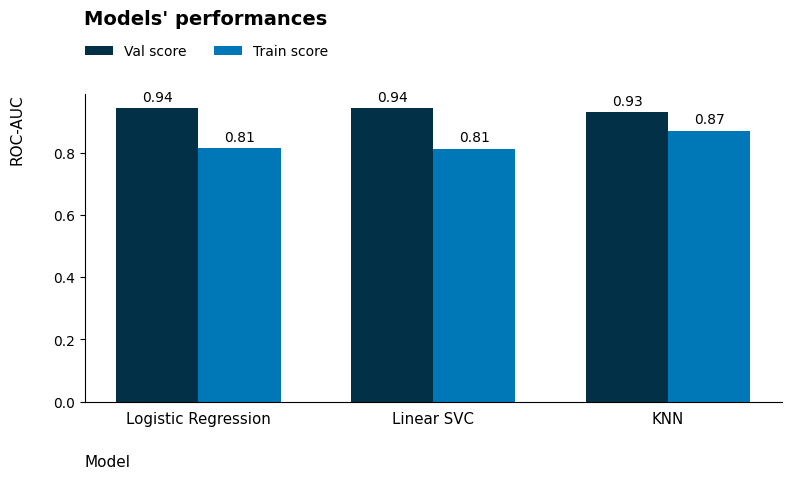

In [ ]:
# K-fold cross validation for linear models
eval_df = classification_kfold_cv(models=linear_models,
                                  X_train=X_train_prepared_linear,
                                  y_train=y_train,
                                  n_folds=5)

# Create a plot to show the Model Performance
plot_classification_kfold_cv(eval_df, bar_width=0.35, figsize=(9, 4), title_size=14, legend_x=0.175, legend_y=1.2, title_pad=50)

# Print the evaluation metrics
eval_df

Decision Tree results: 
--------------------------------------------------
Training score: 1.0
Average validation score: 0.8753257723944357
Standard deviation: 0.010785376285153367
Training time: 0.27186 seconds

Random Forest results: 
--------------------------------------------------
Training score: 1.0
Average validation score: 0.9880305503224843
Standard deviation: 0.002840881939653101
Training time: 2.73534 seconds

[LightGBM] [Info] Number of positive: 1302, number of negative: 6799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5536
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160721 -> initscore=-1.652874
[LightGBM] [Info] Start training from score -1.652874
[LightGBM] [Info] N

,model,avg_val_score,train_score
0,LightGBM,0.992292,1.0
1,Random Forest,0.988031,1.0
2,Decision Tree,0.875326,1.0


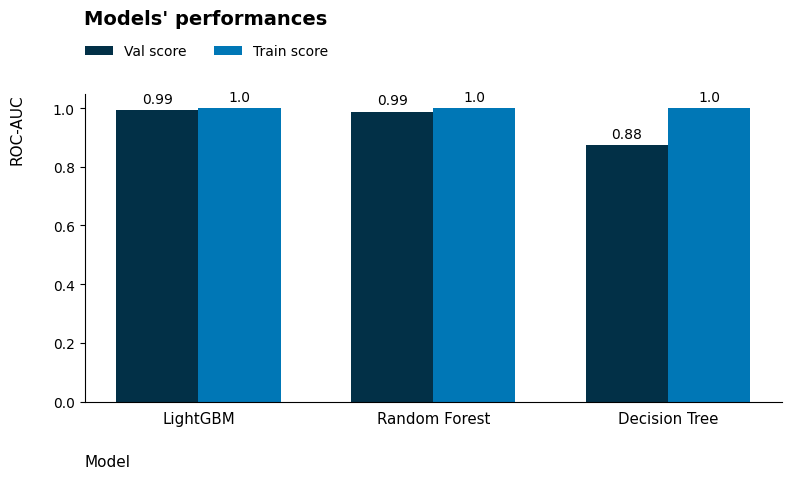

In [ ]:
# K-fold cross validation for Tree-Based models
eval_df = classification_kfold_cv(models=tree_models,
                                  X_train=X_train_prepared_tree,
                                  y_train=y_train,
                                  n_folds=5)
# Create a plot to show the Model Performance
plot_classification_kfold_cv(eval_df, bar_width=0.35, figsize=(9, 4), title_size=14, legend_x=0.175, legend_y=1.2, title_pad=50)
# Print the evaluation metrics
eval_df

The results are great. I will go with LightGBM for feature selection, hyperparameter tuning and final model evaluation because it presents the highest average validation ROC-AUC score. Although the model is overfitted, with a 1 ROC-AUC score on training data, its validation score is very close (0.99). This outstanding performance is not because data leakage, once all the features included are present at the moment of prediction and the split was made before everything. It is due to the quality of the data, the independent variables clearly separate churners and non-churners. Moreover, because of the result, hyperparameter tuning would not even add any performance. However, to demonstrate knowledge, I will apply it.

### Feature selection
- The feature selection step is crucial for improving the model's generalization ability and making it less complex, thus reducing computational costs. Given that we have 40 features, simplifying the model without losing performance is highly advantageous.
- I will use the Recursive Feature Elimination (RFE) method for feature selection.
- Recursive Feature Elimination (RFE) is a feature selection method that systematically removes irrelevant or less important features from a predictive model. It works by recursively training the model on subsets of features, ranking them based on their importance, and eliminating the least important features until the desired number of features is reached
- An important hyperparameter of RFE is the final desired number of features. In order to automatically select this value, I will use sklearn's RFECV class. It will apply stratified k-fold cross validation to find the best value for this hyperparameter.

In [ ]:

# Recursively select the features with highest feature importances until the final desired number of features is obtained
rfe = RecursiveFeatureEliminator(n_folds=5,
                                 scoring='roc_auc',
                                 estimator=LGBMClassifier())
# Fit the Model
rfe.fit(X_train_prepared_tree, y_train)

# Transform the feature into a new scaled feature
X_train_selected = rfe.transform(X_train_prepared_tree)

# Print th dimension of the X_train selected set
X_train_selected.shape

[LightGBM] [Info] Number of positive: 1041, number of negative: 5439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5528
[LightGBM] [Info] Number of data points in the train set: 6480, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160648 -> initscore=-1.653413
[LightGBM] [Info] Start training from score -1.653413
[LightGBM] [Info] Number of positive: 1041, number of negative: 5439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5524
[LightGBM] [Info] Number of data points in the train set: 6480, number of used features: 39
[LightGBM] [Info] [binar

(8101, 25)

In [ ]:
# To see the first 5 rows of final selected features
X_train_selected.head()

,customer_age,contacts_count_12_mon,credit_limit,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,trans_amt_per_dependent,...,products_per_tenure,trans_ct_per_contacts,products_per_inactivity,trans_ct_per_inactivity,trans_amt_per_credit_limit,age_per_tenure,trans_ct_per_tenure,trans_amt_per_tenure,total_spending,education_income_levels
0,36.0,2.0,2570.0,2230.0,0.686,1755.0,42.0,0.448,0.868,0.000000,...,0.166667,21.000000,1.333333,14.000000,0.682879,1.500000,1.750000,73.125000,3985.0,0.0
1,44.0,3.0,25276.0,0.0,0.849,2282.0,38.0,0.583,0.000,760.666687,...,0.138889,12.666667,2.500000,19.000000,0.090283,1.222222,1.055556,63.388889,2282.0,3.0
2,46.0,1.0,11670.0,915.0,0.892,4277.0,89.0,0.854,0.078,2138.500000,...,0.200000,89.000000,2.000000,29.666666,0.366495,1.533333,2.966667,142.566666,5192.0,4.0
3,36.0,3.0,3124.0,1593.0,0.869,1652.0,41.0,0.367,0.510,826.000000,...,0.125000,13.666667,3.000000,41.000000,0.528809,1.500000,1.708333,68.833336,3245.0,3.0
4,50.0,3.0,34516.0,1185.0,0.725,3874.0,72.0,0.714,0.034,3874.000000,...,0.100000,24.000000,2.000000,36.000000,0.112238,1.250000,1.800000,96.849998,5059.0,7.0


In [ ]:
# Converting the selected features to a list
X_train_selected.columns.tolist()

['customer_age',
 'contacts_count_12_mon',
 'credit_limit',
 'total_revolving_bal',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_trans_ct',
 'total_ct_chng_q4_q1',
 'avg_utilization_ratio',
 'trans_amt_per_dependent',
 'trans_ct_per_dependent',
 'trans_amt_per_products',
 'trans_ct_per_products',
 'avg_trans_amt',
 'proportion_inactive_months',
 'products_per_tenure',
 'trans_ct_per_contacts',
 'products_per_inactivity',
 'trans_ct_per_inactivity',
 'trans_amt_per_credit_limit',
 'age_per_tenure',
 'trans_ct_per_tenure',
 'trans_amt_per_tenure',
 'total_spending',
 'education_income_levels']

- As we can see, features that showed a clear discrimination between churners and non-churners were maintained, such as total_trans_ct and total_trans_amt. Moreover, a lot of features created from the feature engineering were also maintained, demonstrating the importance of this task for model's performance.
- As a result, we went from 40 features to 25 final most important features, significantly reducing the computational complexity.

### Hyperparameter tuning
- I will tune the hyperparameters of LightGBM using Bayesian optimization through the optuna library.
- Bayesian optimization performs intelligent searches in the model's hyperparameter space, balancing the exploration-exploitation trade-off.
- Grid search is inefficient because it performs an exhaustive search, testing all possible parameter combinations and not considering parameter interaction effects. This would be detrimental in our case, as the training dataset is extensive, and parameters such as the number of trees and learning rate are related to others.
- In each iteration, we will train the model with the parameters on the training set and evaluate it with stratified k-fold cross validation to avoid overfitting resulting from excessive hyperparameter tuning on the training set.
- It is important to define the hyperparameter scale_pos_weight/class_weight to deal with imbalance. This hyperparameter will allow the model to better learn the patterns of the minority class (absent (1)) by giving greater weight to these instances. This weight will increase the cost of log-loss when misclassifying them, resulting in better learning in this class.
- Hyperparameter tuning represents a refinement. What considerably improves the model's performance is the feature engineering step.
- As I have mentioned before, given the outstanding performance of our model in this high quality data, hyperparameter tuning would not even be necessary. However, to demonstrate knowledge, I will perform it.
- The reference adopted for choosing the hyperparameters can be found at the following link. Normally, a higher number of trees and iterations would be defined. However, given my computer limitations, these parameters will be reduced.
- https://www.linkedin.com/posts/pedro-almeida-ds_voc%C3%AA-fica-perdido-sobre-quais-combina%C3%A7%C3%B5es-activity-7168232226965385216-bvtw?utm_source=share&utm_medium=member_desktop

In [ ]:
def objective(trial):
    # Define the hyperparameter search space.
    params = {
        'objective': 'binary',
        'metric': 'roc_auc',
        'n_estimators': 1000,
        'verbosity': -1,
        'bagging_freq': 1,
        'class_weight': 'balanced',
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**10),
        'subsample': trial.suggest_float('subsample', 0.05, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.05, 1.0),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
    }

    # Train the LightGBM model with the sampled hyperparameters.
    model = LGBMClassifier(**params)

    # Obtain average stratified k-fold cross validation and roc-auc score.
    stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=42)
    val_scores = cross_val_score(model,
                                 X_train_selected,
                                 y_train,
                                 scoring='roc_auc',
                                 cv=stratified_kfold)
    # Calculating average of the cross validation score
    avg_roc_auc = val_scores.mean()

    return avg_roc_auc

# Create an Optuna study
study = optuna.create_study(direction='maximize')

# Optimize the objective function
study.optimize(objective, n_trials=10)

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2025-01-30 10:59:36,872] A new study created in memory with name: no-name-9e476553-8949-4beb-a663-d8f64a83b771
[I 2025-01-30 11:01:08,566] Trial 0 finished with value: 0.9918988594867366 and parameters: {'learning_rate': 0.005413975641452827, 'num_leaves': 742, 'subsample': 0.28817459507133253, 'colsample_bytree': 0.8988171608659744, 'min_data_in_leaf': 7}. Best is trial 0 with value: 0.9918988594867366.
[I 2025-01-30 11:01:32,198] Trial 1 finished with value: 0.9817216783428723 and parameters: {'learning_rate': 0.0010253159691354413, 'num_leaves': 838, 'subsample': 0.767182020450621, 'colsample_bytree': 0.708593571851268, 'min_data_in_leaf': 68}. Best is trial 0 with value: 0.9918988594867366.
[I 2025-01-30 11:02:55,592] Trial 2 finished with value: 0.987633414788862 and parameters: {'learning_rate': 0.002060623414616812, 'num_leaves': 245, 'subsample': 0.9692255440842475, 'colsample_bytree': 0.9299401350803829, 'min_data_in_leaf': 24}. Best is trial 0 with value: 0.991898859486736

Best Hyperparameters: {'learning_rate': 0.005413975641452827, 'num_leaves': 742, 'subsample': 0.28817459507133253, 'colsample_bytree': 0.8988171608659744, 'min_data_in_leaf': 7}


### 7. Final production model testing and evaluation
- In this step, I intends to evaluate our final tuned model on test data (simulating production unseen data).
- Once I am facing a binary classification problem with an imbalanced target, it is important to look at metrics such as ROC-AUC. I want my model to discriminate well between churners and non-churners.
- Once the project objective is to order the customers by the churn probability, it is not necessary to calibrate the probabilities. The outputs of the model satisfy our goal.
- After evaluating the model, I will interpret its results.

Get the final tuned LightGBM model.

In [ ]:
best_params = {'objective': 'binary',
               'metric': 'roc_auc',
               'n_estimators': 1000,
               'verbosity': -1,
               'bagging_freq': 1,
               'class_weight': 'balanced',
               'learning_rate': 0.017535345166904838,
               'num_leaves': 942,
               'subsample': 0.8490611533540497,
               'colsample_bytree': 0.3775159533799494,
               'min_data_in_leaf': 90}

# Tuning with LightGBM Model
lgb_clf = LGBMClassifier(**best_params)
# Fit the model
lgb_clf.fit(X_train_selected, y_train)

LGBMClassifier(bagging_freq=1, class_weight='balanced',
               colsample_bytree=0.3775159533799494,
               learning_rate=0.017535345166904838, metric='roc_auc',
               min_data_in_leaf=90, n_estimators=1000, num_leaves=942,
               objective='binary', subsample=0.8490611533540497, verbosity=-1)

Use the preprocessor to transform the test predictor set. By applying just transform we avoid data leakage.

In [ ]:
# Transform the feature into a new scaled feature
X_test_prepared = tree_preprocessor.transform(X_test)
X_test_selected = rfe.transform(X_test_prepared)

# Print the X_test selected dimension
X_test_selected.shape

(2026, 25)

**Prediction**

In [ ]:
# To predict the X_test selected data
y_pred = lgb_clf.predict(X_test_selected)

Get the model's estimated probabilities of churn.

In [ ]:
# Predict the probability of churn
churn_probas = lgb_clf.predict_proba(X_test_selected)[:, 1]

### Evaluate the final tuned LightGBM model.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1701
           1       0.90      0.89      0.89       325

    accuracy                           0.97      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Brier Score: 0.03
Gini: 0.98
KS: 0.9


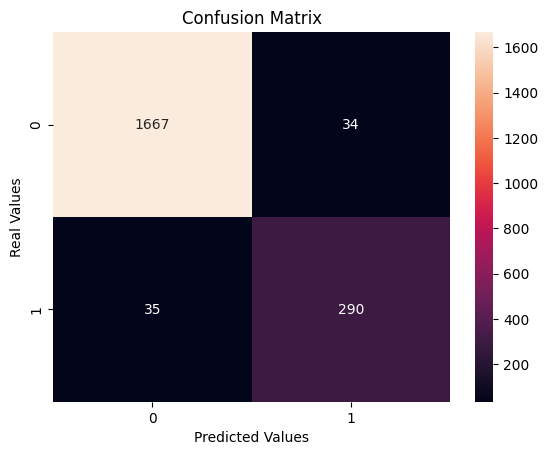

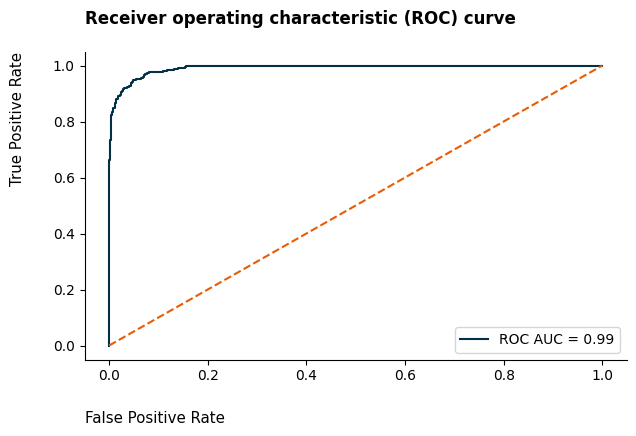

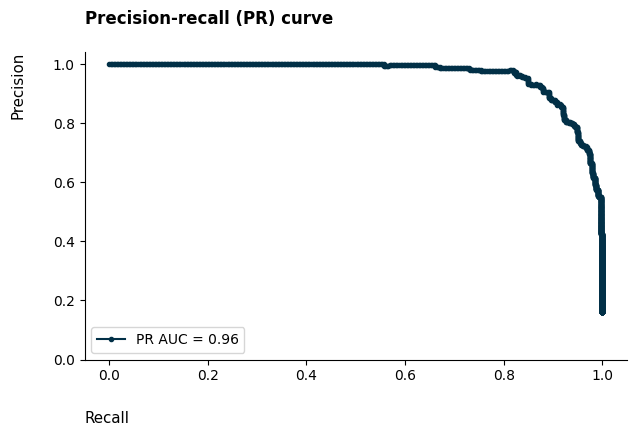

In [ ]:
# To calculate the evaluation metrics
model_metrics = evaluate_classifier(y_test, y_pred, churn_probas)

In [ ]:
# Print the different model metrics and its value
model_metrics

,Metric,Value
0,Accuracy,0.965943
1,Precision,0.895062
2,Recall,0.892308
3,F1-Score,0.893683
4,ROC-AUC,0.991279
5,KS,0.898897
6,Gini,0.982559
7,PR-AUC,0.964932
8,Brier,0.025852


The model results are excellent!

<b>Recall (0.89):</b> The model correctly identifies 89% of the churners. In practical terms, looking at the confusion matrix, it has accurately predicted 290 out of 325 attrited customers.<br>
<b>Precision (0.90):</b> Out of all customers predicted as churn, 90% of them are actually churners. In practical terms, considering the confusion matrix, out of 324 customers predicted as churn, 290 of them are indeed churners.<br>
<b>ROC-AUC (0.99):</b> With a ROC-AUC score of 0.99, the model demonstrates outstanding ability to differentiate between attrited and existing customers. In practive, if we randomly choose a customer that churned and a customer that dind't churn, in 99% of the time the model will estimate a higher probability of churn for that customer who actually attrited.
- This outstanding performance is not because data leakage, once all the features included are present at the moment of prediction and the split was made before everything. It is due to the quality of the data, the independent variables clearly separate churners and non-churners.
- Finally, once the train, test and validation scores are similar, the model's generalization ability is reliable.

- Analyze the predicted probabilities distribution by churn.

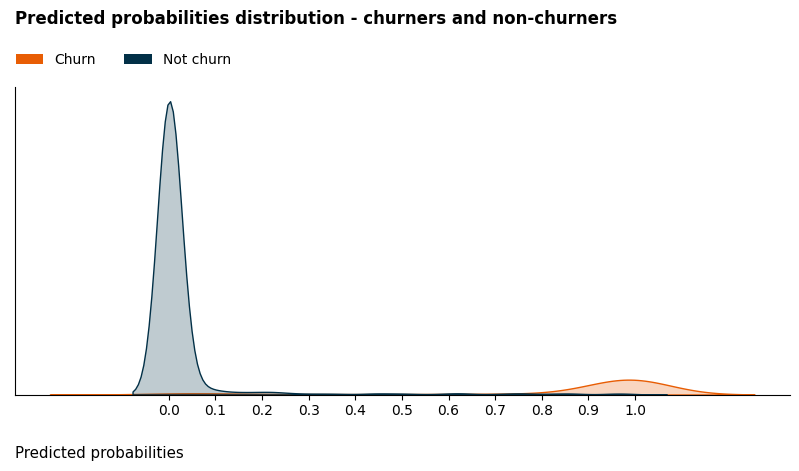

In [ ]:
# Plot the distribution of Predicted probability
plot_probability_distributions(y_test, churn_probas)

- It is possible to see that there is a clear separation between the distributions of the predicted probabilities for churners and non-churners. Great!

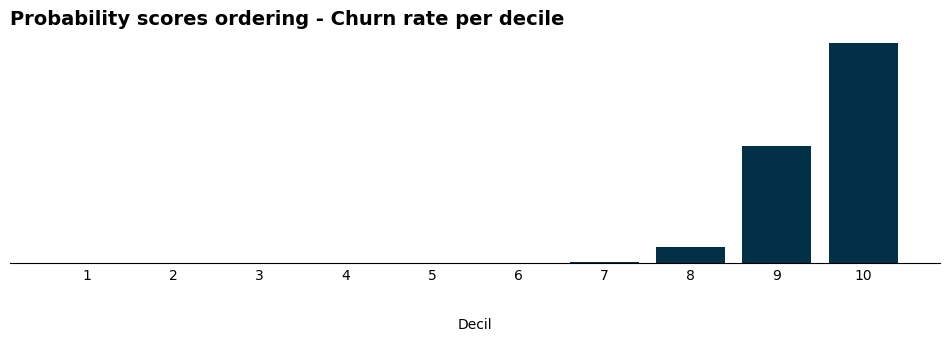

In [ ]:
# Visually see the probability scores in order
probability_scores_ordering(y_test, churn_probas)

- The probability scores ordering is also great. All the churners fall between 7th and 10th deciles.

### Interpret the model results with SHAP values
- To interpret the results of LightGBM, I will analyze the SHAP values.
- SHAP is a library that allows the interpretation of machine learning algorithm results.
- With it, we can understand the impact of each feature on an individual model prediction. f(x) = E(f(x)) + SHAP.
- Basically, the SHAP value of a feature (how much it impacts an individual prediction) is the weighted sum of marginal contributions considering all possible feature coalitions.
- A feature coalition is a group of features, and its value is the individual model prediction using only those features.
- The marginal contribution of a feature is the difference between the predicted value for a feature coalition with and without it.
- We sum the marginal contributions for all possible combinations with and without a feature.
- The weights are based on the probability of the feature we are calculating the SHAP value for being in that combination.

In [ ]:
# Initialize the SHAP explainer with the final model
explainer = shap.Explainer(lgb_clf)

# Compute shap values
shap_values = explainer(X_test_selected)

In [ ]:
# To see the shape of the dataset
np.shape(shap_values.values)

(2026, 25)

In [ ]:
# Assess some true labels
y_test.reset_index(drop=True).sample(10, random_state=42)

,churn_flag
1284,0
982,0
1542,1
593,0
1292,1
781,0
1576,0
367,0
1782,0
1788,0


- We have 25 variables. For each one, we have a corresponding SHAP value for every observation.
- For binary classification, we interpret the results in terms of log-odds. In the following plots, E(f(X)) represents the average prediction of log-odds. Log-odds is basically the logarithm of odds, the ratio between the probability of the event happening and the probability of the event not happening. Logarithm is used to convert odds to a linear scale. Positive SHAP values increase the log-odds and consequently the probability of churning, and vice versa.
- To obtain the probability of churning from the log-odds, simply pass through the logistic function, defined as $$ \text{sigmoid}(x) = \frac{1}{1 + e^{-\ln\left(\frac{p}{1-p}\right)}} $$
- Through the waterfall plot, we will visualize the contribution of each feature in the prediction for a positive (churner) and negative (non-churner) instance.


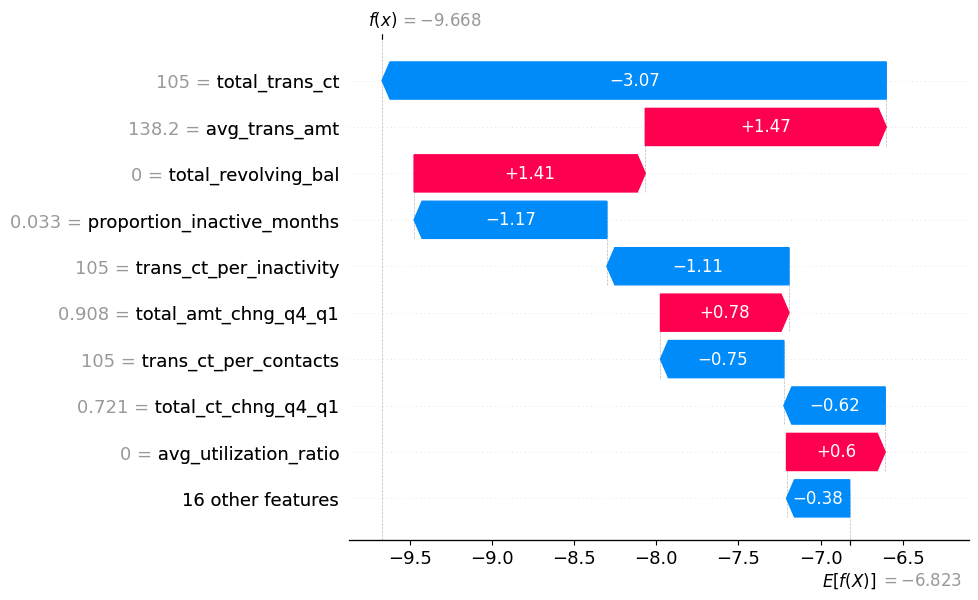

In [ ]:
# Create a waterfall plot to show the shap values
shap.plots.waterfall(shap_values[1])

- This customer did not churn. The estimated probability of churning for him through the logistic function is very close to zero,
- It is possible to see that the number of transactions made (in the last 12 months), which is equal to 105 in this case, reduced the log-odds of churning by 3.07. In contrast, the total revolving balance, which is zero, increased the log-odds of churning in 1.41. This makes total sense, since we saw that the higher the number of transactions the lower the churn risk, and a lot of churners were concentrated in null values of total revolving balance and average utilization ratio.
- Look how features we created in feature engineering impacted negatively or positively the log-odds of churning, in proportion_inactive_months and trans_ct_per_inactivity.

For example, to see the below waterfall plot to understand.

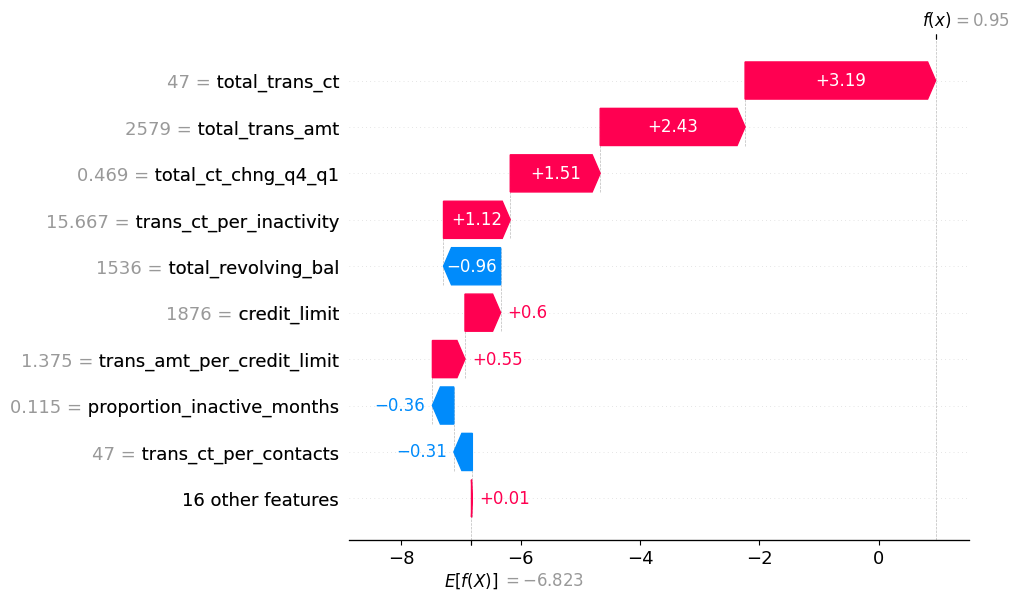

In [ ]:
# To show the waterfall chart with specific shap value
shap.plots.waterfall(shap_values[1542])

- This customer churned. The estimated probability of churning for him through the aforementioned logistic function is about 72%.
- It is possible to observe that, again, the number of transactions (in the last 12 months) increased the log-odds of churning by 3.19, which makes total sense, as mentioned before.

- Now, through the bar plot, we will observe which features are most important. In this plot, we have the average absolute SHAP value for each feature, indicating which features contribute more (positively or negatively) to the model predictions.

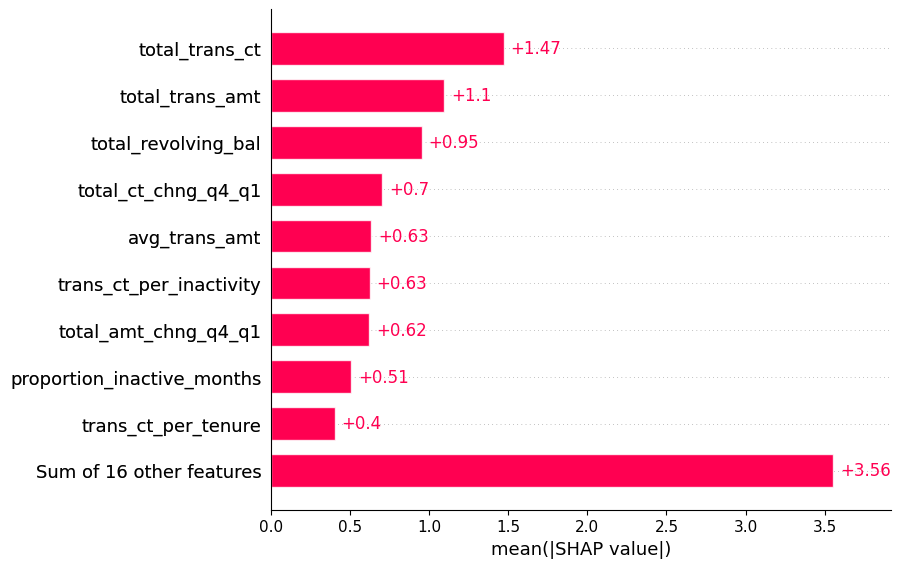

In [ ]:
# Create a bar plot to understand differenct features with shap_values
shap.plots.bar(shap_values)

- As expected, the number of transactions and the amount of transactions in the last 12 months are the most important features. It makes total sense, and we saw on eda that these variables presented a clear discrimination between churners and non-churners. Moreover, features we created on feature engineering step figured out as part of the most important ones, ilustrating the importance of this task in imporving a machine learning model's performance. It is the case for trans_ct_per_inactivity and avg_trans_amt, for example.

- Now, through the beeswarm plot, we can observe the relationship between the features and the model prediction.

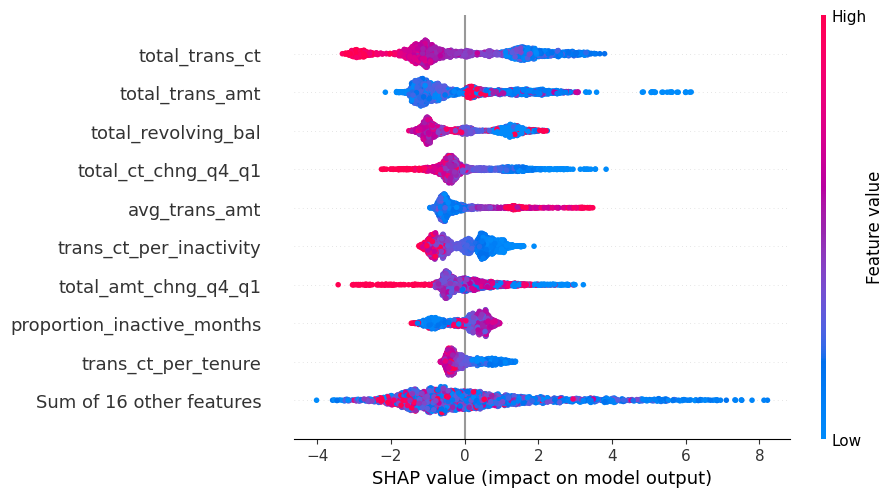

In [ ]:
# Create a beeswarm plot to undestand relationship between the features and the model prediction.
shap.plots.beeswarm(shap_values)

- It is noticeable that lower values of transaction counts in the last 12 months have a positive impact in the log-odds of churning, and, consequently, in the probability of churning, while higher values have a negative impact.
- Surprisingly, higher values of average transaction amount tend to reflect a positive impact in the log-odds of churning, and, consequently, in the probability of churning, while lower values tend to have a negative impact.

### Financial results
- I will express the model's performance in terms of financial results for the bank in order to show that the project is worth it. I will do this looking at the confusion matrix and our current data.
- I don't have access to specific data to obtain the exact financial gain. However, a common revenue source for credit card companies is charging fees on the outstanding balance, known as the total revolving balance, which cardholders carry from month to month. Thus, I will assume the bank's fee is 18% (a common value) and calculate the financial gain with it.
- Considering this, in order to estimate the financial gain provided by the model, I will take into account the following costs and benefits:
    1. Retention cost per client (false positive):
        - This cost applies to customers who wouldn't churn but were misclassified as churners by the model, leading the bank to incur expenses in retaining them. Specifically, to retain the customer, I will offer a discount on the fee, reducing it from 18% to 10%, resulting in a loss of revenue due to this 8% discount.
    2. Revenue loss per churner (false negative):
        - This cost arises when customers who are actually going to churn are not correctly identified by the model, leading to the bank losing both these clients and the associated revenue. This cost will encompass the entire fee (18%) applied to the outstanding balances.
    3. Financial gain with the retention of a customer correctly predicted as a churner (true positive):
        - This gain occurs when the model accurately predicts a churner, enabling us to retain them along with the revenue they generate, applying the 10% fee on total revolving balances as our retention strategy.

Get a dataset for financial results.

In [ ]:
# Concatenating X_test and y_test dataset and considering specific columns
financial_results = pd.concat([X_test, y_test], axis=1)[['total_revolving_bal', 'churn_flag']]
# Taking predicted variable as y_pred
financial_results['predicted'] = y_pred

Get separate datasets for false positives, false negatives and true positives costs and gain estimation.

In [ ]:
fp_data = financial_results.loc[(financial_results['churn_flag'] == 0) & (financial_results['predicted'] == 1)]
fn_data = financial_results.loc[(financial_results['churn_flag'] == 1) & (financial_results['predicted'] == 0)]
tp_data = financial_results.loc[(financial_results['churn_flag'] == 1) & (financial_results['predicted'] == 1)]

Estimate the costs and gain.

In [ ]:
fp_data['fp_cost'] = fp_data['total_revolving_bal']*1.18 - fp_data['total_revolving_bal']*1.10
fn_data['fn_cost'] = fn_data['total_revolving_bal']*1.18
tp_data['tp_gain'] = tp_data['total_revolving_bal']*1.10

Finally, the financial result given by the model will be the difference between the gain and the costs.

In [ ]:
financial_gain = tp_data['tp_gain'].sum() - fp_data['fp_cost'].sum() - fn_data['total_revolving_bal'].sum()
print(f'The model provides a financial gain of: ${financial_gain:.1f}')

The model provides a financial gain of: $171477.2


Wow! Our model yields an estimated financial result of approximately $171,477. The actual amount will depend on the bank's management when implementing retention strategies for customers based on the predicted churn probabilities. For example, if the bank wishes to be more conservative, reducing expenses associated with false positives, it can target customers with higher churn probabilities, thereby altering the potential gain. Nevertheless, for estimation and foundational purposes, we have confirmed that the project is worthwhile.

# 8. Conclusions
- In this project, I have built a LightGBM classifier for predicting customer's probability of churning in a bank's credit card service. The objective of the project was to build a model that was able to accurately predict the probability of a customer to churn, uncover the churn factors within the available features and offer action plans to minimize the problem. By doing this, the company can plan strategies for retention, maintaining healthy revenue. Acquiring new customers is costlier than keeping existing ones.
- The business problem is solved now. My model is able to correctly predict 89% of the churners, with an AUC of 0.99 and an outstanding ability to discriminate between churners and non-churners! It indicates that, if we randomly choose a churner and a non-churner, in 99% of the time, the model will estimate a higher probability of churning for the customer who actually attrited. Furthermore, it was possible to uncover the main churn factors during the EDA step and provide some suggestions for the bank regard to attrition patterns.
- In order to deal with the imbalanced target, the strategies used were: Stratified hold-out and k-fold cross validation, and class_weight hyperparameter. I did not inted to use SMOTE because in real life it doesn't work. My goal here is to simulate a real data science case and solution.
- The model results were interpreted and they are coherent! By looking at shap, it was possible to assess the features with the highest predictive power for the analysis and how they impact the model's outcome for single and all observations. In the EDA step, I had already thought these features would be the most useful, reinforcing that the estimator outcomes make sense. Finally, the model's estimated probabilities also make sense and thus everything is working fine.
- The project is worthwile. It provides a base estimated financial result of approximately $171,477. The concrete result will depend on the fees charged by the bank and its management when implementing retention strategies for customers based on the predicted churn probabilities. However, for estimation and foundational purposes, we have confirmed that it is worth it.

# Save and load Model for future use

In [ ]:
'''
This script aims to provide util functions to be used in components and pipeline.
'''

'''
Importing the libraries.
'''

# File handling.
import os
import pickle


def save_object(file_path, object):
    '''
    Save a Python object to a binary file using pickle serialization.

    This function takes an object and a file path as input and saves the object to the specified file using pickle
    serialization. If the directory of the file does not exist, it will be created.

    Args:
        file_path (str): The path to the file where the object will be saved.
        object_to_save: The Python object that needs to be saved.

    Raises:
        CustomException: If any exception occurs during the file saving process, a custom exception is raised with
                         the original exception details.

    Example:
        save_object("saved_object.pkl", my_data)

    Note:
        This function uses pickle to serialize the object. Be cautious when loading pickled data, as it can pose
        security risks if loading data from untrusted sources.
    '''

    try:
        dir_path = os.path.dirname(file_path)
        os.makedirs(dir_path, exist_ok=True)

        with open(file_path, 'wb') as file_object:
            pickle.dump(object, file_object)

    except Exception as e:
        raise CustomException(e, sys)


def load_object(file_path):
    '''
    Load a Python object from a binary file using pickle deserialization.

    This function reads and deserializes a Python object from the specified binary file using pickle. It returns the
    loaded object.

    Args:
        file_path (str): The path to the file from which the object will be loaded.

    Returns:
        object: The Python object loaded from the file.

    Raises:
        CustomException: If any exception occurs during the file loading process, a custom exception is raised with
                         the original exception details.
    '''

    try:
        with open(file_path, 'rb') as file_object:
            return pickle.load(file_object)

    except Exception as e:
        raise CustomException(e, sys)

**To refer:** Model Depolyment uploaded in another file in this repository.